In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import inspection
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import  GridSearchCV

from sklearn import tree
from os import system

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

import scipy
from scipy import stats
from scipy.stats import randint as sp_randint

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
concretedata= pd.read_csv('concrete.csv')

### Univariate analysis

### datatypes and the description of independent attributes , as well as dependent variable 'strength'

In [3]:
concretedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### No null or NAN data in dataset

In [4]:
concretedata.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
if (concretedata.isnull().values.any() == True) | ( concretedata.isna().values.any() == True):
    print( '\033[1mconcrete-data has missing values\033[0m')
else:
        print('\033[1mconcrete-data does not have any missing values\033[0m')

concrete-data does not have any missing values


### Variable names , range of values , mean , median(50%), std deviation and quartiles . Included dependent variable 'strength' also

In [6]:
concretedata.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
if concretedata.duplicated().any() == True:
    print("concrete-data has duplicates")
else:
    print("concrete-data does not have duplicates")

concrete-data has duplicates


In [8]:
dup = pd.Series(concretedata.duplicated(), name='dupes')

In [9]:
dup

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: dupes, Length: 1030, dtype: bool

In [10]:
concretedata1 = concretedata.copy()

In [11]:
concretedata1['dupes'] = dup.values

In [12]:
concretedata1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,False
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,False
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,False
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,False
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,False
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,False
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,False
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,False
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,False


### List of duplicate records

In [13]:
concretedata1.where(concretedata1['dupes'] == True).dropna()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,1.0
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,1.0
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,1.0
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,1.0
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,77.30,1.0
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28.0,19.69,1.0
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91.0,65.20,1.0
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.30,1.0
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56.0,64.30,1.0
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28.0,71.30,1.0


In [14]:
concretedata1.where( (concretedata1['cement'] == 362.6) & (concretedata1['slag'] == 189) & (concretedata1['water'] == 164.9)
                   & (concretedata1['superplastic'] == 11.6) & ( concretedata1['coarseagg'] == 944.7) 
                   &  (concretedata1['fineagg'] == 755.8) & (concretedata1['age'] == 3)  ).dropna()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.3,0.0
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.3,1.0
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.3,1.0
943,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.3,1.0


In [15]:
concretedata_dup = concretedata1.where(concretedata1['dupes'] == True).dropna()

In [16]:
concretedata_dup

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,1.0
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,1.0
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,1.0
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,1.0
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,77.30,1.0
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28.0,19.69,1.0
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91.0,65.20,1.0
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.30,1.0
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56.0,64.30,1.0
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28.0,71.30,1.0


In [17]:
concretedata_dup.reset_index(inplace= True)
concretedata_dup

,index,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
0,278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,1.0
1,298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,1.0
2,400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,1.0
3,420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,1.0
4,463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,77.30,1.0
5,468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28.0,19.69,1.0
6,482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91.0,65.20,1.0
7,493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.30,1.0
8,517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56.0,64.30,1.0
9,525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28.0,71.30,1.0


### Removing duplicate records from the dataframe

In [18]:
concretedata_dr = concretedata1.drop_duplicates()
concretedata_dr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,False
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,False
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,False
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,False
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,False
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,False
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,False
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,False
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,False


In [19]:
concretedata_dr.duplicated().dropna()

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1016, dtype: bool

### Confirming no more duplicates in dataframe concretedata_dr

In [20]:
if concretedata_dr.duplicated().any() == True:
    print("concretedata_dr has duplicates")
else:
    print("concretedata_dr does not have duplicates")

concretedata_dr does not have duplicates


### Check if any negative data in the records

In [21]:
concretedata_dr.where(concretedata_dr.any() < 0).dropna()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes


### Plotting the independent variables to find distribution and outliers

#### plots and tests for 'cement' data

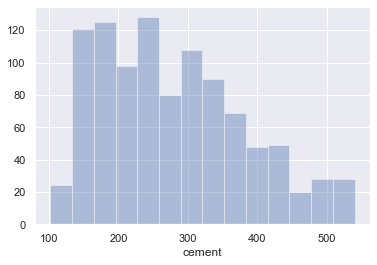

In [22]:
sns.distplot(concretedata_dr['cement'], kde=False);

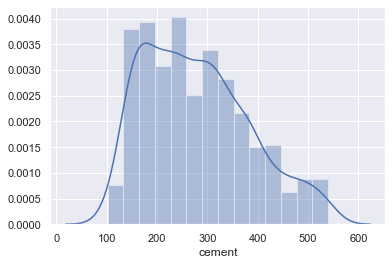

In [23]:
sns.distplot(concretedata_dr['cement']);

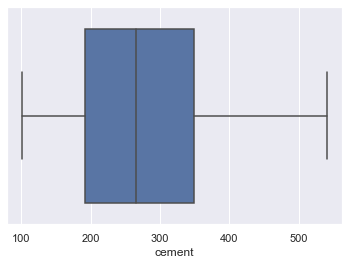

In [24]:
sns.boxplot(concretedata_dr['cement']);

In [25]:
scipy.stats.skew(concretedata_dr['cement'].to_numpy())

0.540616598754475

In [26]:
scipy.stats.skewtest(concretedata_dr['cement'].to_numpy())

SkewtestResult(statistic=6.657829668794715, pvalue=2.779005632312636e-11)

In [27]:
scipy.stats.kurtosis(concretedata_dr['cement'].to_numpy())

-0.47671697597155926

#### Above tests shows that :
    1> There are no outliers for cement data 
    2> There is skewness in data for cement , which is right tailed , though not highly skewed 
    3> Kurtosisi is also not zero , and the value indicates it is light tailed
    4> skew and kurtosis results indicate that the distribution for cement data is not normal

#### plots and tests for 'slag' data

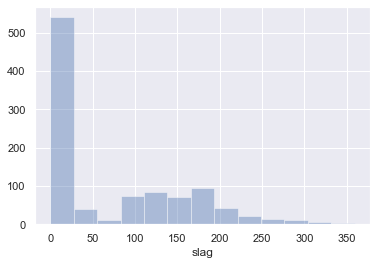

In [28]:
sns.distplot(concretedata_dr['slag'], kde=False);

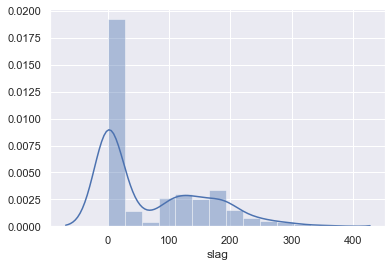

In [29]:
sns.distplot(concretedata_dr['slag']);

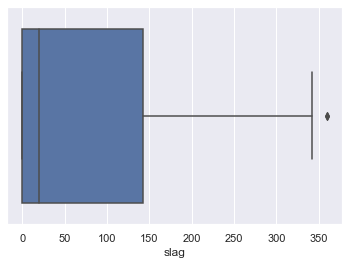

In [30]:
sns.boxplot(concretedata_dr['slag']);

In [31]:
scipy.stats.skew(concretedata_dr['slag'].to_numpy())

0.833748640105193

In [32]:
scipy.stats.skewtest(concretedata_dr['slag'].to_numpy())

SkewtestResult(statistic=9.612762135693279, pvalue=7.062841875472184e-22)

In [33]:
scipy.stats.kurtosis(concretedata_dr['slag'].to_numpy())

-0.4464669401008665

#### Above tests shows that :
    1> There is one outlier for slag data , which is > 350
    2> Distribution plot shows it is almost bi-modal
    3> There is skewness in data for slag , which is right tailed and moderately skewed
    4> Kurtosis is also not zero , and the value indicates it is light tailed
    5> plot, skew and kurtosis results indicate that the distribution for slag data is not normal

#### plots and tests for 'ash' data

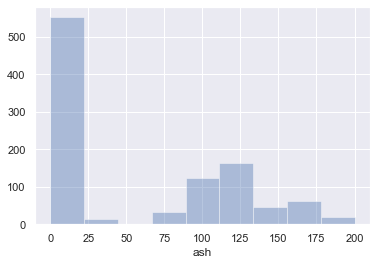

In [34]:
sns.distplot(concretedata_dr['ash'], kde=False);

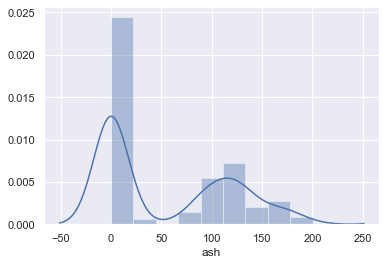

In [35]:
sns.distplot(concretedata_dr['ash']);

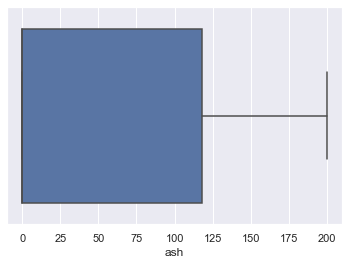

In [36]:
sns.boxplot(concretedata_dr['ash']);

In [37]:
scipy.stats.skew(concretedata_dr['ash'].to_numpy())

0.5142903177286736

In [38]:
scipy.stats.skewtest(concretedata_dr['ash'].to_numpy())

SkewtestResult(statistic=6.367053008630213, pvalue=1.9269459441076495e-10)

In [39]:
scipy.stats.kurtosis(concretedata_dr['ash'].to_numpy())

-1.3495693370816586

#### Above tests shows that :
    1> There are no outliers for ash data 
    2> Distribution plot shows it is bi-modal
    3> There is skewness in data for ash , which is right tailed and moderately skewed
    4> Kurtosis is also not zero , and the value indicates it is light tailed
    5> plot, skew and kurtosis results indicate that the distribution for ash data is not normal

#### plots and tests for 'water' data

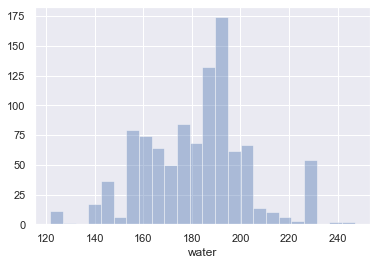

In [40]:
sns.distplot(concretedata_dr['water'], kde=False);

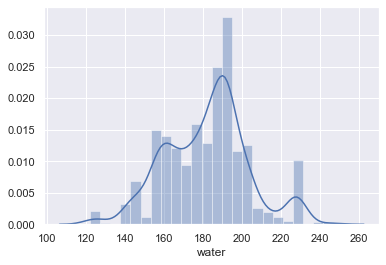

In [41]:
sns.distplot(concretedata_dr['water']);

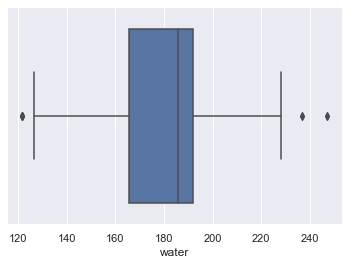

In [42]:
sns.boxplot(concretedata_dr['water']);

In [43]:
scipy.stats.skew(concretedata_dr['water'].to_numpy())

0.05082273196096026

In [44]:
scipy.stats.skewtest(concretedata_dr['water'].to_numpy())

SkewtestResult(statistic=0.6657242643276251, pvalue=0.5055873612787474)

In [45]:
scipy.stats.kurtosis(concretedata_dr['water'].to_numpy())

0.1387521961684679

#### Above tests shows that :
    1> There are some outliers for water data 
    2> Distribution plot shows multi mode tendency
    3> There is skewness in data for ash , which is right tailed , but minor
    4> Kurtosis is also not zero , and the value indicates it is light tailed
    5> plot, skew and kurtosis results indicate that the distribution for water data closer to normal

#### plots and tests for 'superplastic' data

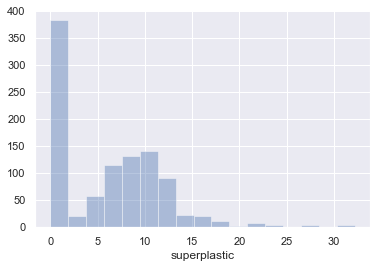

In [46]:
sns.distplot(concretedata_dr['superplastic'], kde=False);

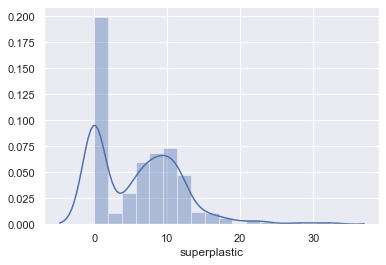

In [47]:
sns.distplot(concretedata_dr['superplastic']);

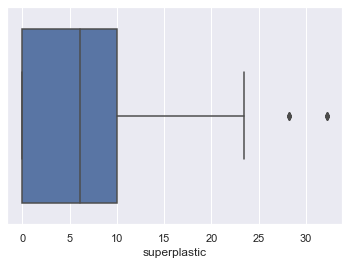

In [48]:
sns.boxplot(concretedata_dr['superplastic']);

In [49]:
scipy.stats.skew(concretedata_dr['superplastic'].to_numpy())

0.9475124801723167

In [50]:
scipy.stats.skewtest(concretedata_dr['superplastic'].to_numpy())

SkewtestResult(statistic=10.626639843040032, pvalue=2.2403955437298063e-26)

In [51]:
scipy.stats.kurtosis(concretedata_dr['superplastic'].to_numpy())

1.5455609830670864

#### Above tests shows that :
    1> There are some outliers for superplastic data 
    2> Distribution plot shows it is bi-modal
    3> There is skewness in data for superplastic , which is right tailed and is more skewed
    4> Kurtosis is also not zero , and the value indicates it is too peaked
    5> plot, skew and kurtosis results indicate that the distribution for superplastic data is not normal

#### plots and tests for 'coarseagg' data

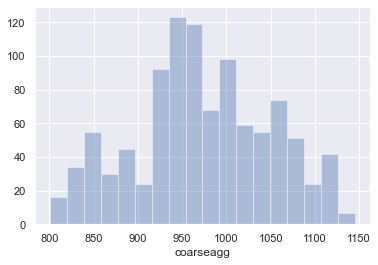

In [52]:
sns.distplot(concretedata_dr['coarseagg'], kde=False);

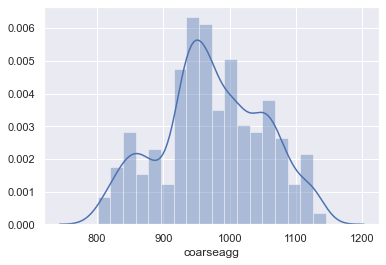

In [53]:
sns.distplot(concretedata_dr['coarseagg']);

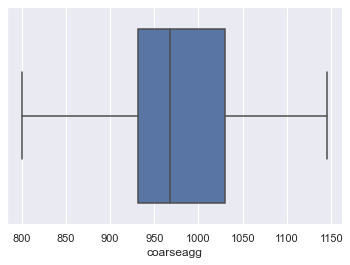

In [54]:
sns.boxplot(concretedata_dr['coarseagg']);

In [55]:
scipy.stats.skew(concretedata_dr['coarseagg'].to_numpy())

-0.05437338321118765

In [56]:
scipy.stats.skewtest(concretedata_dr['coarseagg'].to_numpy())

SkewtestResult(statistic=-0.7121691903878337, pvalue=0.4763600129801395)

In [57]:
scipy.stats.kurtosis(concretedata_dr['coarseagg'].to_numpy())

-0.5990108135965735

#### Above tests shows that :
    1> There are no outliers for coarseagg data 
    2> Distribution plot shows it is normal like
    3> There is skewness in data for coarseagg , which is left tailed and has minor skeweness
    4> Kurtosis is also not zero , and the value indicates it is light tailed
    5> plot, skew and kurtosis results indicate that the distribution for coarseagg data close to normal

#### plots and tests for 'fineagg' data

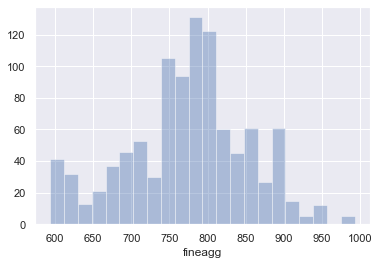

In [58]:
sns.distplot(concretedata_dr['fineagg'], kde=False);

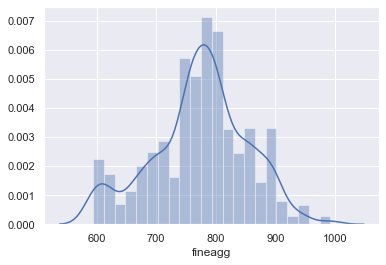

In [59]:
sns.distplot(concretedata_dr['fineagg']);

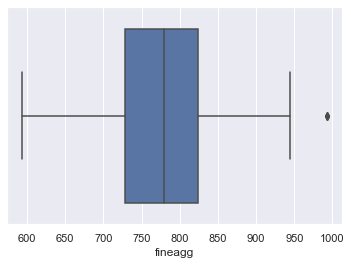

In [60]:
sns.boxplot(concretedata_dr['fineagg']);

In [61]:
scipy.stats.skew(concretedata_dr['fineagg'].to_numpy())

-0.2536340847032821

In [62]:
scipy.stats.skewtest(concretedata_dr['fineagg'].to_numpy())

SkewtestResult(statistic=-3.274236813102971, pvalue=0.0010594778131295566)

In [63]:
scipy.stats.kurtosis(concretedata_dr['fineagg'].to_numpy())

-0.11265454972446154

#### Above tests shows that :
    1> There is one outlier for fineagg data 
    2> Distribution plot shows it is normal like
    3> There is skewness in data for fineagg , which is left tailed and has minor skeweness
    4> Kurtosis is also not zero , and the value indicates it is light tailed and minor
    5> plot, skew and kurtosis results indicate that the distribution for fineagg data close to normal

#### plots and tests for 'age' data

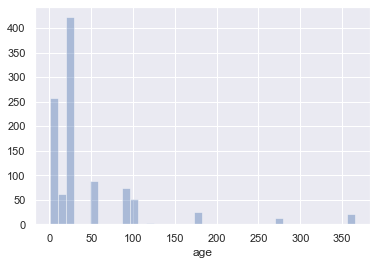

In [64]:
sns.distplot(concretedata_dr['age'], kde=False);

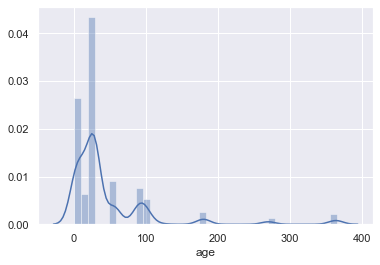

In [65]:
sns.distplot(concretedata_dr['age']);

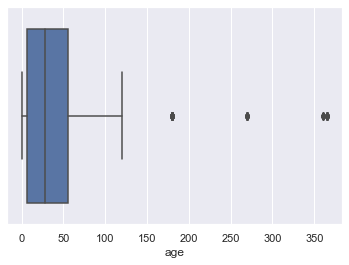

In [66]:
sns.boxplot(concretedata_dr['age']);

In [67]:
scipy.stats.skew(concretedata_dr['age'].to_numpy())

3.2571227413645567

In [68]:
scipy.stats.skewtest(concretedata_dr['age'].to_numpy())

SkewtestResult(statistic=22.52144625366335, pvalue=2.558800101294367e-112)

In [69]:
scipy.stats.kurtosis(concretedata_dr['age'].to_numpy())

11.994672483942232

#### Above tests shows that :
    1> There are outliers for age data 
    2> Distribution plot shows it multi modal
    3> There is skewness in data for age , which is right tailed and heavily skewed
    4> Kurtosis is also not zero , and the value indicates it has high peakness
    5> plot, skew and kurtosis results indicate that the distribution for age data is not normal

### Bi-variate analysis

In [70]:
concretedata_dr1 = concretedata_dr.drop('dupes', axis = 1)
concretedata_dr1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


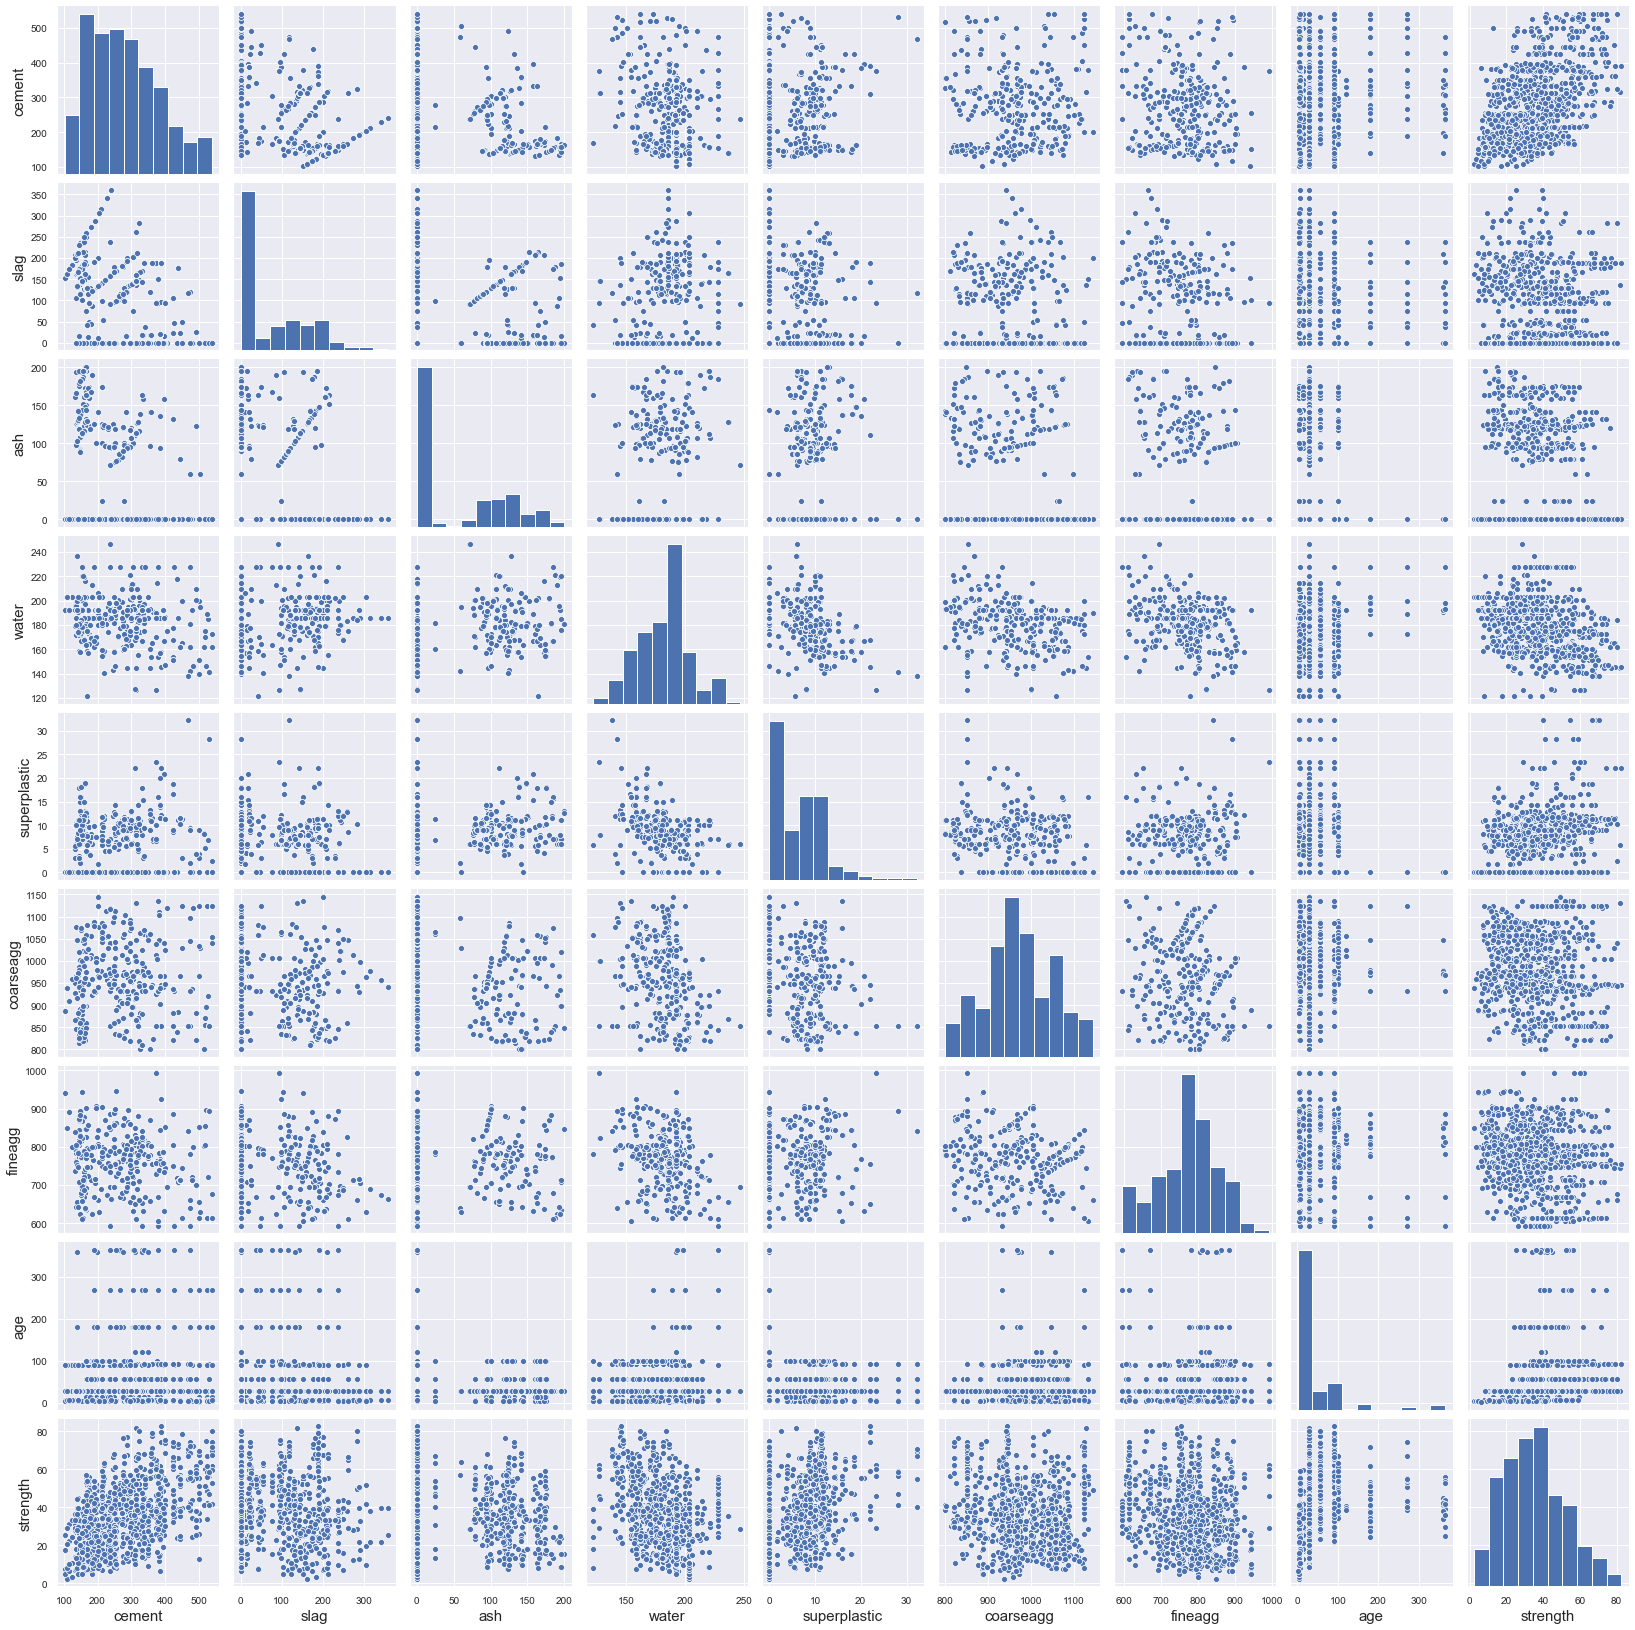

In [71]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
sns.pairplot(concretedata_dr1);

#### Based on above pair plot , some correlation is seen. 
    1> However , the plot between 'cement' and 'strength' (dependenat variable) shows a linear type of relationship.
    2> Also somewhat linear relationship between 'coarseagg' and 'fineagg'
    3> Some linear relation seen between 'ash' and 'slag' data
    4> Some what negative coreelation between 'slag' and 'fineagg'

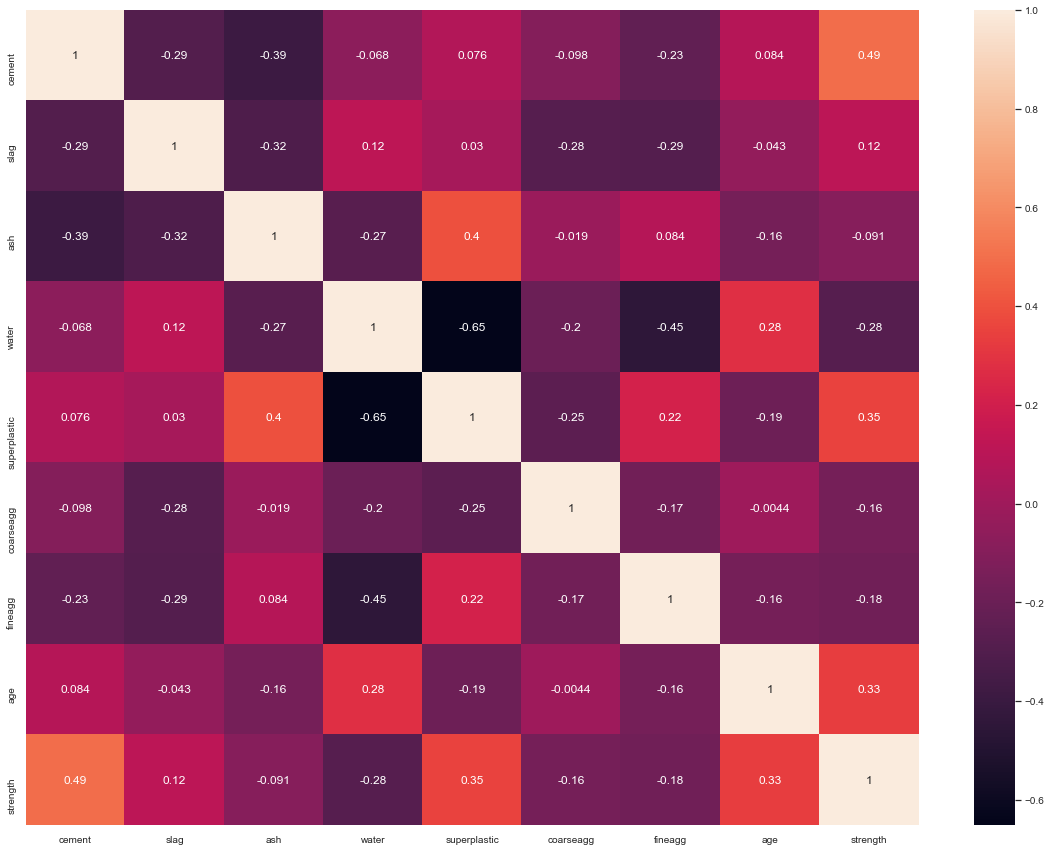

In [72]:
plt.figure(figsize=(20,15))
sns.heatmap(concretedata_dr1.corr(), annot=True);

#### The correlation plot shows that:
    1> Relatively high Negative correlation between 'superplastic' and 'water' (-0.65)
    2> Relatively high negative correlation between 'fineagg' and 'water' (-0.45)
    3> Relatively high negative coorelation between 'ash' and 'cement' (-0.39)
    4> Negative corelation between 'water' and dependent variable 'strength' (-0.28)
    5> There are other negative correlations like between 'ash' & 'water' , and between 'coarseagg' & 'superplastic'
    6> Positive correlation between 'age' & 'water' (0.28)
    7> Positive correlation between 'fineagg' & 'superplastic' (0.22)
    8> Relatively high positive correlation between 'cement' & dependent variable 'strength' (0.49) 
    9> Relatively high positive correlation between 'superplastic' & dependent variable 'strength' (0.35)
    10> Relatively high positive correlation between 'age' & dependent variable 'strength' (0.33)

### Feature Engineering

#### check if new features can be extracted

#### coarseagg and fineagg total and proportion

In [73]:
coarseagg_percent = (( concretedata_dr1['coarseagg'])/(concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

In [74]:
coarseagg_percent

0       56.490147
1       57.581247
2       52.631868
3       58.177278
4       60.053896
          ...    
1025    54.416761
1026    48.808569
1027    53.106689
1028    58.177278
1029    64.729574
Length: 1016, dtype: float64

In [75]:
fineagg_percent = (100 - coarseagg_percent)
fineagg_percent

0       43.509853
1       42.418753
2       47.368132
3       41.822722
4       39.946104
          ...    
1025    45.583239
1026    51.191431
1027    46.893311
1028    41.822722
1029    35.270426
Length: 1016, dtype: float64

In [76]:
concretedata_dr1['coarseagg_percent'] = coarseagg_percent
concretedata_dr1['fineagg_percent'] = fineagg_percent

In [77]:
concretedata_dr1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,coarseagg_percent,fineagg_percent
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,56.490147,43.509853
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,57.581247,42.418753
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,52.631868,47.368132
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,58.177278,41.822722
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,60.053896,39.946104
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,54.416761,45.583239
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,48.808569,51.191431
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,53.106689,46.893311
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,58.177278,41.822722


In [78]:
# Reorder columns
concretedata_dr1 = concretedata_dr1[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'coarseagg_percent'
                                    , 'fineagg_percent', 'age', 'strength']]

In [79]:
concretedata_dr1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,coarseagg_percent,fineagg_percent,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,56.490147,43.509853,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,57.581247,42.418753,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,52.631868,47.368132,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,58.177278,41.822722,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,54.416761,45.583239,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,48.808569,51.191431,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,53.106689,46.893311,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,58.177278,41.822722,270,55.06


In [80]:
cement_percent = (( concretedata_dr1['cement'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

slag_percent = (( concretedata_dr1['slag'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

ash_percent = (( concretedata_dr1['ash'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

water_percent = (( concretedata_dr1['water'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

superplastic_percent = (( concretedata_dr1['superplastic'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

coarseagg_overall_pc = (( concretedata_dr1['coarseagg'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

fineagg_overall_pc = (( concretedata_dr1['fineagg'])/( concretedata_dr1['cement'] + concretedata_dr1['slag'] + 
                concretedata_dr1['ash'] + concretedata_dr1['water'] + concretedata_dr1['superplastic'] + 
                concretedata_dr1['coarseagg'] + concretedata_dr1['fineagg']))*100

In [81]:
concretedata_dr1.insert(1, 'cement_pc', cement_percent)
concretedata_dr1

,cement,cement_pc,slag,ash,water,superplastic,coarseagg,fineagg,coarseagg_percent,fineagg_percent,age,strength
0,141.3,6.205261,212.0,0.0,203.5,0.0,971.8,748.5,56.490147,43.509853,28,29.89
1,168.9,7.092169,42.2,124.3,158.3,10.8,1080.8,796.2,57.581247,42.418753,14,23.51
2,250.0,10.608054,0.0,95.7,187.4,5.5,956.9,861.2,52.631868,47.368132,28,29.22
3,266.0,12.036199,114.0,0.0,228.0,0.0,932.0,670.0,58.177278,41.822722,28,45.85
4,154.8,6.775507,183.4,0.0,193.3,9.1,1047.4,696.7,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,5.981391,0.0,166.0,180.0,10.0,961.0,805.0,54.416761,45.583239,28,13.29
1026,531.3,21.711414,0.0,0.0,141.8,28.2,852.1,893.7,48.808569,51.191431,3,41.30
1027,276.4,11.967440,116.0,90.3,179.6,8.9,870.1,768.3,53.106689,46.893311,28,44.28
1028,342.0,15.475113,38.0,0.0,228.0,0.0,932.0,670.0,58.177278,41.822722,270,55.06


In [82]:
concretedata_dr1.insert(3, 'slag_pc', slag_percent)
concretedata_dr1

,cement,cement_pc,slag,slag_pc,ash,water,superplastic,coarseagg,fineagg,coarseagg_percent,fineagg_percent,age,strength
0,141.3,6.205261,212.0,9.310087,0.0,203.5,0.0,971.8,748.5,56.490147,43.509853,28,29.89
1,168.9,7.092169,42.2,1.771992,124.3,158.3,10.8,1080.8,796.2,57.581247,42.418753,14,23.51
2,250.0,10.608054,0.0,0.000000,95.7,187.4,5.5,956.9,861.2,52.631868,47.368132,28,29.22
3,266.0,12.036199,114.0,5.158371,0.0,228.0,0.0,932.0,670.0,58.177278,41.822722,28,45.85
4,154.8,6.775507,183.4,8.027312,0.0,193.3,9.1,1047.4,696.7,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,5.981391,0.0,0.000000,166.0,180.0,10.0,961.0,805.0,54.416761,45.583239,28,13.29
1026,531.3,21.711414,0.0,0.000000,0.0,141.8,28.2,852.1,893.7,48.808569,51.191431,3,41.30
1027,276.4,11.967440,116.0,5.022515,90.3,179.6,8.9,870.1,768.3,53.106689,46.893311,28,44.28
1028,342.0,15.475113,38.0,1.719457,0.0,228.0,0.0,932.0,670.0,58.177278,41.822722,270,55.06


In [83]:
concretedata_dr1.insert(5, 'ash_pc', ash_percent)
concretedata_dr1

,cement,cement_pc,slag,slag_pc,ash,ash_pc,water,superplastic,coarseagg,fineagg,coarseagg_percent,fineagg_percent,age,strength
0,141.3,6.205261,212.0,9.310087,0.0,0.000000,203.5,0.0,971.8,748.5,56.490147,43.509853,28,29.89
1,168.9,7.092169,42.2,1.771992,124.3,5.219400,158.3,10.8,1080.8,796.2,57.581247,42.418753,14,23.51
2,250.0,10.608054,0.0,0.000000,95.7,4.060763,187.4,5.5,956.9,861.2,52.631868,47.368132,28,29.22
3,266.0,12.036199,114.0,5.158371,0.0,0.000000,228.0,0.0,932.0,670.0,58.177278,41.822722,28,45.85
4,154.8,6.775507,183.4,8.027312,0.0,0.000000,193.3,9.1,1047.4,696.7,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,5.981391,0.0,0.000000,166.0,7.354896,180.0,10.0,961.0,805.0,54.416761,45.583239,28,13.29
1026,531.3,21.711414,0.0,0.000000,0.0,0.000000,141.8,28.2,852.1,893.7,48.808569,51.191431,3,41.30
1027,276.4,11.967440,116.0,5.022515,90.3,3.909768,179.6,8.9,870.1,768.3,53.106689,46.893311,28,44.28
1028,342.0,15.475113,38.0,1.719457,0.0,0.000000,228.0,0.0,932.0,670.0,58.177278,41.822722,270,55.06


In [84]:
concretedata_dr1.insert(7, 'water_pc', water_percent)
concretedata_dr1

,cement,cement_pc,slag,slag_pc,ash,ash_pc,water,water_pc,superplastic,coarseagg,fineagg,coarseagg_percent,fineagg_percent,age,strength
0,141.3,6.205261,212.0,9.310087,0.0,0.000000,203.5,8.936806,0.0,971.8,748.5,56.490147,43.509853,28,29.89
1,168.9,7.092169,42.2,1.771992,124.3,5.219400,158.3,6.647071,10.8,1080.8,796.2,57.581247,42.418753,14,23.51
2,250.0,10.608054,0.0,0.000000,95.7,4.060763,187.4,7.951797,5.5,956.9,861.2,52.631868,47.368132,28,29.22
3,266.0,12.036199,114.0,5.158371,0.0,0.000000,228.0,10.316742,0.0,932.0,670.0,58.177278,41.822722,28,45.85
4,154.8,6.775507,183.4,8.027312,0.0,0.000000,193.3,8.460629,9.1,1047.4,696.7,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,5.981391,0.0,0.000000,166.0,7.354896,180.0,7.975188,10.0,961.0,805.0,54.416761,45.583239,28,13.29
1026,531.3,21.711414,0.0,0.000000,0.0,0.000000,141.8,5.794614,28.2,852.1,893.7,48.808569,51.191431,3,41.30
1027,276.4,11.967440,116.0,5.022515,90.3,3.909768,179.6,7.776238,8.9,870.1,768.3,53.106689,46.893311,28,44.28
1028,342.0,15.475113,38.0,1.719457,0.0,0.000000,228.0,10.316742,0.0,932.0,670.0,58.177278,41.822722,270,55.06


In [85]:
concretedata_dr1.insert(9, 'superplastic_pc', superplastic_percent)
concretedata_dr1

,cement,cement_pc,slag,slag_pc,ash,ash_pc,water,water_pc,superplastic,superplastic_pc,coarseagg,fineagg,coarseagg_percent,fineagg_percent,age,strength
0,141.3,6.205261,212.0,9.310087,0.0,0.000000,203.5,8.936806,0.0,0.000000,971.8,748.5,56.490147,43.509853,28,29.89
1,168.9,7.092169,42.2,1.771992,124.3,5.219400,158.3,6.647071,10.8,0.453496,1080.8,796.2,57.581247,42.418753,14,23.51
2,250.0,10.608054,0.0,0.000000,95.7,4.060763,187.4,7.951797,5.5,0.233377,956.9,861.2,52.631868,47.368132,28,29.22
3,266.0,12.036199,114.0,5.158371,0.0,0.000000,228.0,10.316742,0.0,0.000000,932.0,670.0,58.177278,41.822722,28,45.85
4,154.8,6.775507,183.4,8.027312,0.0,0.000000,193.3,8.460629,9.1,0.398302,1047.4,696.7,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,5.981391,0.0,0.000000,166.0,7.354896,180.0,7.975188,10.0,0.443066,961.0,805.0,54.416761,45.583239,28,13.29
1026,531.3,21.711414,0.0,0.000000,0.0,0.000000,141.8,5.794614,28.2,1.152384,852.1,893.7,48.808569,51.191431,3,41.30
1027,276.4,11.967440,116.0,5.022515,90.3,3.909768,179.6,7.776238,8.9,0.385348,870.1,768.3,53.106689,46.893311,28,44.28
1028,342.0,15.475113,38.0,1.719457,0.0,0.000000,228.0,10.316742,0.0,0.000000,932.0,670.0,58.177278,41.822722,270,55.06


In [86]:
concretedata_dr1.insert(11, 'coarseagg_oa_pc', coarseagg_overall_pc)
concretedata_dr1.insert(13, 'fineagg_oa_pc', fineagg_overall_pc)
concretedata_dr1

,cement,cement_pc,slag,slag_pc,ash,ash_pc,water,water_pc,superplastic,superplastic_pc,coarseagg,coarseagg_oa_pc,fineagg,fineagg_oa_pc,coarseagg_percent,fineagg_percent,age,strength
0,141.3,6.205261,212.0,9.310087,0.0,0.000000,203.5,8.936806,0.0,0.000000,971.8,42.677089,748.5,32.870757,56.490147,43.509853,28,29.89
1,168.9,7.092169,42.2,1.771992,124.3,5.219400,158.3,6.647071,10.8,0.453496,1080.8,45.383162,796.2,33.432710,57.581247,42.418753,14,23.51
2,250.0,10.608054,0.0,0.000000,95.7,4.060763,187.4,7.951797,5.5,0.233377,956.9,40.603386,861.2,36.542623,52.631868,47.368132,28,29.22
3,266.0,12.036199,114.0,5.158371,0.0,0.000000,228.0,10.316742,0.0,0.000000,932.0,42.171946,670.0,30.316742,58.177278,41.822722,28,45.85
4,154.8,6.775507,183.4,8.027312,0.0,0.000000,193.3,8.460629,9.1,0.398302,1047.4,45.844093,696.7,30.494157,60.053896,39.946104,28,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,5.981391,0.0,0.000000,166.0,7.354896,180.0,7.975188,10.0,0.443066,961.0,42.578644,805.0,35.666814,54.416761,45.583239,28,13.29
1026,531.3,21.711414,0.0,0.000000,0.0,0.000000,141.8,5.794614,28.2,1.152384,852.1,34.820808,893.7,36.520780,48.808569,51.191431,3,41.30
1027,276.4,11.967440,116.0,5.022515,90.3,3.909768,179.6,7.776238,8.9,0.385348,870.1,37.673190,768.3,33.265501,53.106689,46.893311,28,44.28
1028,342.0,15.475113,38.0,1.719457,0.0,0.000000,228.0,10.316742,0.0,0.000000,932.0,42.171946,670.0,30.316742,58.177278,41.822722,270,55.06


### Train Test Split

In [87]:
X = concretedata_dr1.drop('strength', axis = 1)
y= concretedata_dr1['strength']
print(X.head())
print(y.head())

   cement  cement_pc   slag   slag_pc    ash    ash_pc  water   water_pc  \
0   141.3   6.205261  212.0  9.310087    0.0  0.000000  203.5   8.936806   
1   168.9   7.092169   42.2  1.771992  124.3  5.219400  158.3   6.647071   
2   250.0  10.608054    0.0  0.000000   95.7  4.060763  187.4   7.951797   
3   266.0  12.036199  114.0  5.158371    0.0  0.000000  228.0  10.316742   
4   154.8   6.775507  183.4  8.027312    0.0  0.000000  193.3   8.460629   

   superplastic  superplastic_pc  coarseagg  coarseagg_oa_pc  fineagg  \
0           0.0         0.000000      971.8        42.677089    748.5   
1          10.8         0.453496     1080.8        45.383162    796.2   
2           5.5         0.233377      956.9        40.603386    861.2   
3           0.0         0.000000      932.0        42.171946    670.0   
4           9.1         0.398302     1047.4        45.844093    696.7   

   fineagg_oa_pc  coarseagg_percent  fineagg_percent  age  
0      32.870757          56.490147        4

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 3)

In [89]:
X_train.head()

,cement,cement_pc,slag,slag_pc,ash,ash_pc,water,water_pc,superplastic,superplastic_pc,coarseagg,coarseagg_oa_pc,fineagg,fineagg_oa_pc,coarseagg_percent,fineagg_percent,age
416,333.0,14.485819,0.0,0.000000,0.0,0.000000,192.0,8.352184,0.0,0.000000,931.2,40.508091,842.6,36.653906,52.497463,47.502537,90
479,173.8,7.355368,93.4,3.952770,159.9,6.767108,172.3,7.291887,9.7,0.410513,1007.2,42.625587,746.6,31.596767,57.429581,42.570419,100
348,213.5,8.992882,0.0,0.000000,174.2,7.337517,159.2,6.705699,11.7,0.492818,1043.6,43.957710,771.9,32.513373,57.482787,42.517213,56
159,304.0,13.755656,76.0,3.438914,0.0,0.000000,228.0,10.316742,0.0,0.000000,932.0,42.171946,670.0,30.316742,58.177278,41.822722,365
826,139.7,6.355778,163.9,7.456779,127.7,5.809827,236.7,10.768881,5.8,0.263876,868.6,39.517743,655.6,29.827116,56.987272,43.012728,28


In [90]:
X_test.head()

,cement,cement_pc,slag,slag_pc,ash,ash_pc,water,water_pc,superplastic,superplastic_pc,coarseagg,coarseagg_oa_pc,fineagg,fineagg_oa_pc,coarseagg_percent,fineagg_percent,age
269,251.4,10.697417,0.0,0.000000,118.3,5.033828,188.5,8.020935,5.8,0.246798,1028.4,43.759840,757.7,32.241181,57.577963,42.422037,56
695,310.0,13.341367,0.0,0.000000,0.0,0.000000,192.0,8.263040,0.0,0.000000,971.0,41.788604,850.6,36.606989,53.304787,46.695213,3
450,321.0,14.005236,0.0,0.000000,128.0,5.584642,182.0,7.940663,11.0,0.479930,870.0,37.958115,780.0,34.031414,52.727273,47.272727,28
467,261.9,11.453186,110.5,4.832291,86.1,3.765251,195.4,8.545065,5.0,0.218656,895.2,39.148117,732.6,32.037434,54.994471,45.005529,28
197,318.8,13.098858,212.5,8.731202,0.0,0.000000,155.7,6.397403,14.3,0.587559,852.1,35.011094,880.4,36.173884,49.183261,50.816739,91


### Try Linear regression models. 
    1> A simple lienar model may not give us good results. 
    2> Will also try polynomial quadratic  and cubic models also. 
    3> Will also try wth and without scaler . 
    4> Will also use the standard data , with out the derived percentage features , with Linear regressors , to find if 
        it improves the scores.

#### DataFrame to capture linear regression results

In [91]:
## Creating  a dataframe to store the score results
m = 'a'
c= 'a'
row_index = 0

reg_report_df = pd.DataFrame( [[ m, c, 0, 0, 0, 0]],
                              columns = [ 'Model no', 'Classifier','train accuracy', 'test accuracy','rmse', 'r2 score'])
# print(class_report_df)
reg_report_df.drop(0, inplace= True)
print(reg_report_df)

Empty DataFrame
Columns: [Model no, Classifier, train accuracy, test accuracy, rmse, r2 score]
Index: []


#### Try Simple Linear regression model

In [92]:
m = 'model1'
c= 'Linear Regressor'

model1 = LinearRegression(n_jobs = -1)
model1.fit(X_train, y_train)

# predict on test
y_predict1 = model1.predict(X_test)

print('Accuracy of training data set: ',model1.score(X_train, y_train) )
print('Accuracy of testing data set: ', model1.score(X_test, y_test) )

rmse_1 = mean_squared_error(y_test, y_predict1)**0.5
r2_1 = r2_score(y_test, y_predict1)
print("Root Mean Square Error: ", rmse_1)
print("R2 Score:", r2_1)

row_index = row_index + 1
reg_report_1 = [m,c,model1.score(X_train, y_train), model1.score(X_test, y_test), rmse_1, r2_1 ]
reg_report_df.loc[row_index] = reg_report_1

reg_report_df


Accuracy of training data set:  0.6229036783643329
Accuracy of testing data set:  0.643202004491136
Root Mean Square Error:  10.15226287569271
R2 Score: 0.643202004491136


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,0.643202,10.152263,0.643202


#### Try polynomial Linear regression - quadratic

In [93]:
m = 'model2'
c= 'Linear Regressor-deg 2'

model2 = make_pipeline(PolynomialFeatures(degree=2) , LinearRegression(n_jobs = -1) )
model2.fit(X_train, y_train)

# predict on test
y_predict2 = model2.predict(X_test)

print('Accuracy of training data set: ',model2.score(X_train, y_train) )
print('Accuracy of testing data set: ', model2.score(X_test, y_test ) )

rmse_2 = mean_squared_error(y_test, y_predict2)**0.5
r2_2 = r2_score(y_test, y_predict2)
print("Root Mean Square Error: ", rmse_2)
print("R2 Score:", r2_2)

row_index = row_index + 1
reg_report_2 = [m,c,model2.score(X_train, y_train), model2.score(X_test, y_test), rmse_2, r2_2 ]
reg_report_df.loc[row_index] = reg_report_2

reg_report_df

Accuracy of training data set:  0.8705272352244245
Accuracy of testing data set:  0.7498846386140721
Root Mean Square Error:  8.500056930529015
R2 Score: 0.7498846386140721


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,0.643202,10.152263,0.643202
2,model2,Linear Regressor-deg 2,0.870527,0.749885,8.500057,0.749885


#### Try polynomial Linear regression - cubic

In [94]:
m = 'model3'
c= 'Linear Regressor-deg 3'

model3 = make_pipeline(PolynomialFeatures(degree=3) , LinearRegression(n_jobs = -1) )
model3.fit(X_train, y_train)

# predict on test
y_predict3 = model3.predict(X_test)

print('Accuracy of training data set: ',model3.score(X_train, y_train) )
print('Accuracy of testing data set: ', model3.score(X_test, y_test ) )

rmse_3 = mean_squared_error(y_test, y_predict3)**0.5
r2_3 = r2_score(y_test, y_predict3)
print("Root Mean Square Error: ", rmse_3)
print("R2 Score:", r2_3)

row_index = row_index + 1
reg_report_3 = [m,c,model3.score(X_train, y_train), model3.score(X_test, y_test), rmse_3, r2_3 ]
reg_report_df.loc[row_index] = reg_report_3

reg_report_df

Accuracy of training data set:  0.9712834450824135
Accuracy of testing data set:  -8306.702193939242
Root Mean Square Error:  1549.1451498020404
R2 Score: -8306.702193939242


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,0.643202,10.152263,0.643202
2,model2,Linear Regressor-deg 2,0.870527,0.749885,8.500057,0.749885
3,model3,Linear Regressor-deg 3,0.971283,-8306.702194,1549.145150,-8306.702194


#### Try polynomial Linear regression - quartic

In [95]:
m = 'model4'
c= 'Linear Regressor-deg 4'

model4 = make_pipeline(PolynomialFeatures(degree=4) , LinearRegression(n_jobs = -1) )
model4.fit(X_train, y_train)

# predict on test
y_predict4 = model4.predict(X_test)

print('Accuracy of training data set: ',model4.score(X_train, y_train) )
print('Accuracy of testing data set: ', model4.score(X_test, y_test ) )

rmse_4 = mean_squared_error(y_test, y_predict4)**0.5
r2_4 = r2_score(y_test, y_predict4)
print("Root Mean Square Error: ", rmse_4)
print("R2 Score:", r2_4)

row_index = row_index + 1
reg_report_4 = [m,c,model4.score(X_train, y_train), model4.score(X_test, y_test), rmse_4, r2_4 ]
reg_report_df.loc[row_index] = reg_report_4

reg_report_df

Accuracy of training data set:  0.9922862289744171
Accuracy of testing data set:  -45124322877.071526
Root Mean Square Error:  3610413.9675826244
R2 Score: -45124322877.071526


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10


#### Try polynomial Linear regression - quadratic with scaler

In [96]:
m = 'model5'
c= 'Linear Regressor-deg 2-scaler'

scaler = StandardScaler()

model5 = make_pipeline(PolynomialFeatures(degree=2) , scaler, LinearRegression(n_jobs = -1) )
model5.fit(X_train, y_train)

# predict on test
y_predict5 = model5.predict(X_test)

print('Accuracy of training data set: ',model5.score(X_train, y_train) )
print('Accuracy of testing data set: ', model5.score(X_test, y_test ) )

rmse_5 = mean_squared_error(y_test, y_predict5)**0.5
r2_5 = r2_score(y_test, y_predict5)
print("Root Mean Square Error: ", rmse_5)
print("R2 Score:", r2_5)

row_index = row_index + 1
reg_report_5 = [m,c,model5.score(X_train, y_train), model5.score(X_test, y_test), rmse_5, r2_5 ]
reg_report_df.loc[row_index] = reg_report_5

reg_report_df

Accuracy of training data set:  0.8117969400557588
Accuracy of testing data set:  0.7009862851191968
Root Mean Square Error:  9.293883108114171
R2 Score: 0.7009862851191968


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01


#### Try polynomial Linear regression - cubic, with scaler

In [97]:
m = 'model6'
c= 'Linear Regressor-deg 3- scaler'

scaler = StandardScaler()

model6 = make_pipeline(PolynomialFeatures(degree=3) , scaler, LinearRegression(n_jobs = -1) )
model6.fit(X_train, y_train)

# predict on test
y_predict6 = model6.predict(X_test)

print('Accuracy of training data set: ',model6.score(X_train, y_train) )
print('Accuracy of testing data set: ', model6.score(X_test, y_test ) )

rmse_6 = mean_squared_error(y_test, y_predict6)**0.5
r2_6 = r2_score(y_test, y_predict6)
print("Root Mean Square Error: ", rmse_6)
print("R2 Score:", r2_6)

row_index = row_index + 1
reg_report_6 = [m,c,model6.score(X_train, y_train), model6.score(X_test, y_test), rmse_6, r2_6 ]
reg_report_df.loc[row_index] = reg_report_6

reg_report_df

Accuracy of training data set:  0.9712874202879805
Accuracy of testing data set:  -15352.995712848988
Root Mean Square Error:  2106.019359657414
R2 Score: -15352.995712848988


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04


#### Test without the calculated percentage columns

In [98]:
concretedata_dr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,dupes
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,False
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,False
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,False
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,False
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,False
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,False
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,False
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,False
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,False


In [99]:
X1 = concretedata_dr.drop(['strength', 'dupes'], axis = 1)
y1 = concretedata_dr['strength']
print(X1)
print(y1)

      cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28
...      ...    ...    ...    ...           ...        ...      ...  ...
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7

[1016 rows x 8 columns]
0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1

In [100]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30 , random_state = 3)

In [101]:
X1_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
269,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56
695,310.0,0.0,0.0,192.0,0.0,971.0,850.6,3
450,321.0,0.0,128.0,182.0,11.0,870.0,780.0,28
467,261.9,110.5,86.1,195.4,5.0,895.2,732.6,28
197,318.8,212.5,0.0,155.7,14.3,852.1,880.4,91


In [102]:
y1_test.head()

269    36.97
695     9.87
450    37.26
467    33.72
197    68.10
Name: strength, dtype: float64

In [103]:
m = 'model7'
c= 'Lin Reg-no percent -deg 2-scaler'

scaler = StandardScaler()

model7 = make_pipeline(PolynomialFeatures(degree=2) , scaler, LinearRegression(n_jobs = -1) )
model7.fit(X1_train, y1_train)

# predict on test
y_predict7 = model7.predict(X1_test)

print('Accuracy of training data set: ',model7.score(X1_train, y1_train) )
print('Accuracy of testing data set: ', model7.score(X1_test, y1_test ) )

rmse_7 = mean_squared_error(y_test, y_predict7)**0.5
r2_7 = r2_score(y_test, y_predict7)
print("Root Mean Square Error: ", rmse_7)
print("R2 Score:", r2_7)

row_index = row_index + 1
reg_report_7 = [m,c,model7.score(X1_train, y1_train), model7.score(X1_test, y1_test), rmse_7, r2_7 ]
reg_report_df.loc[row_index] = reg_report_7

reg_report_df

Accuracy of training data set:  0.8078475624507065
Accuracy of testing data set:  0.783398563063869
Root Mean Square Error:  7.910106273278353
R2 Score: 0.783398563063869


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01


In [104]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10


### It is seen that the Polynomial Linear regression with degree =2 , without derived percentages features , with Scaling applied, has better test scores , from among Linear regression models. The R2 score is 0.7833986

## Creating models and Tuning - using other Algorithms

### Linear regression was already tried and the best R2 score obtained was 0.7833986 . Will use  Decision Tree, Random Forest regressor , Ada Boost Regressor and Gradient Boosting regressor as the estimators

### Try with Decision Tree Model , with the added precent based features

In [105]:
m = 'model8'
c= 'Dec Tree Reg-with percent-dTree1 '

model8 = DecisionTreeRegressor(max_depth = 3, max_features = 'sqrt', min_samples_split= 10,min_samples_leaf= 5,
                                criterion = 'friedman_mse', random_state=3)
model8.fit(X_train, y_train)

print(model8.score(X_train, y_train))
print(model8.score(X_test, y_test))

# predict on test
y_predict8 = model8.predict(X_test)

print('Accuracy of training data set: ',model8.score(X_train, y_train) )
print('Accuracy of testing data set: ', model8.score(X_test, y_test ) )

rmse_8 = mean_squared_error(y_test, y_predict8)**0.5
r2_8 = r2_score(y_test, y_predict8)
print("Root Mean Square Error: ", rmse_8)
print("R2 Score:", r2_8)

row_index = row_index + 1
reg_report_8 = [m,c,model8.score(X_train, y_train), model8.score(X_test, y_test), rmse_8, r2_8 ]
reg_report_df.loc[row_index] = reg_report_8

reg_report_df

0.5434437735258563
0.4721974610850027
Accuracy of training data set:  0.5434437735258563
Accuracy of testing data set:  0.4721974610850027
Root Mean Square Error:  12.347737524716303
R2 Score: 0.4721974610850027


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01


### Try with Decision Tree Model , without the added precent based features

In [106]:
m = 'model9'
c= 'Dec Tree Reg-no percent-dTree2 '

model9 = DecisionTreeRegressor(max_depth = 3, max_features = 'sqrt', min_samples_split= 10,min_samples_leaf= 5,
                                criterion = 'friedman_mse', random_state=3)
model9.fit(X1_train, y1_train)

print(model9.score(X1_train, y1_train))
print(model9.score(X1_test, y1_test))

# predict on test
y1_predict9 = model9.predict(X1_test)

print('Accuracy of training data set: ',model9.score(X1_train, y1_train) )
print('Accuracy of testing data set: ', model9.score(X1_test, y1_test ) )

rmse_9 = mean_squared_error(y1_test, y1_predict9)**0.5
r2_9 = r2_score(y1_test, y1_predict9)
print("Root Mean Square Error: ", rmse_9)
print("R2 Score:", r2_9)

row_index = row_index + 1
reg_report_9 = [m,c,model9.score(X1_train, y1_train), model9.score(X1_test, y1_test), rmse_9, r2_9 ]
reg_report_df.loc[row_index] = reg_report_9

reg_report_df

0.5075129049585925
0.5295627033565151
Accuracy of training data set:  0.5075129049585925
Accuracy of testing data set:  0.5295627033565151
Root Mean Square Error:  11.657422166142847
R2 Score: 0.5295627033565151


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01


#### Using Bagging regressor, with base estimator from model8 decison tree

In [107]:
m = 'model10'
c= 'Bagging Reg-with Base Est D Tree-with percent'

model10 = BaggingRegressor(base_estimator=model8, n_estimators=50,max_features = 4, n_jobs= -1, random_state=3)

model10.fit(X_train, y_train)

print(model10.score(X_train, y_train))
print(model10.score(X_test, y_test))

# predict on test
y_predict10 = model10.predict(X_test)

print('Accuracy of training data set: ',model10.score(X_train, y_train) )
print('Accuracy of testing data set: ', model10.score(X_test, y_test ) )

rmse_10 = mean_squared_error(y_test, y_predict10)**0.5
r2_10 = r2_score(y_test, y_predict10)
print("Root Mean Square Error: ", rmse_10)
print("R2 Score:", r2_10)

row_index = row_index + 1
reg_report_10 = [m,c,model10.score(X_train, y_train), model10.score(X_test, y_test), rmse_10, r2_10 ]
reg_report_df.loc[row_index] = reg_report_10

reg_report_df

0.4718026180761813
0.43766430376800625
Accuracy of training data set:  0.4718026180761813
Accuracy of testing data set:  0.43766430376800625
Root Mean Square Error:  12.745282850120951
R2 Score: 0.43766430376800625


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Try with Random Forest regressor , with derived percent based features

In [108]:
m = 'model11'
c= 'Random Forest Reg-with percent'

model11 = RandomForestRegressor(criterion='mse', max_depth=4, max_features = 'sqrt', min_samples_leaf=5,
                      min_samples_split=20, n_estimators=100, random_state = 3)

model11.fit(X_train, y_train)
y_predict11 = model11.predict(X_test)

print('Accuracy of training data set: ',  model11.score(X_train, y_train))
print('Accuracy of testing data set: ', model11.score(X_test, y_test))

rmse_11 = mean_squared_error(y_test, y_predict11)**0.5
r2_11 = r2_score(y_test, y_predict11)
print("Root Mean Square Error: ", rmse_11)
print("R2 Score:", r2_11)

# Check Feature importances
important_features = pd.DataFrame( model11.feature_importances_, index=X_train.columns, columns=
                                     ['importance']).sort_values('importance', ascending=False)
print('\nImportant Features are :\n', important_features, '\n')

row_index = row_index + 1
reg_report_11 = [m,c,model11.score(X_train, y_train), model11.score(X_test, y_test), rmse_11, r2_11 ]
reg_report_df.loc[row_index] = reg_report_11

reg_report_df

Accuracy of training data set:  0.7595608349260693
Accuracy of testing data set:  0.7311918619736322
Root Mean Square Error:  8.8119669158478
R2 Score: 0.7311918619736322

Important Features are :
                    importance
age                  0.316610
cement               0.137586
cement_pc            0.131019
water_pc             0.090833
water                0.051198
coarseagg_oa_pc      0.045405
superplastic         0.041083
superplastic_pc      0.037695
fineagg_oa_pc        0.025340
slag_pc              0.024292
slag                 0.023910
fineagg              0.019387
coarseagg            0.018532
ash_pc               0.014683
ash                  0.010361
coarseagg_percent    0.006905
fineagg_percent      0.005164 



,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [109]:
#reg_report_df.drop([14], inplace= True)

####  ### Try with Random Forest regressor, without  the derived percentage based features

In [110]:
m = 'model11A'
c= 'Random Forest Reg-no percent'

model11A = RandomForestRegressor(criterion='mse', max_depth=4, max_features = 'sqrt', min_samples_leaf=5,
                      min_samples_split=20, n_estimators=100, random_state = 3)

model11A.fit(X1_train, y1_train)
y1_predict11A = model11A.predict(X1_test)

print('Accuracy of training data set: ',  model11A.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model11A.score(X1_test, y1_test))

rmse_11A = mean_squared_error(y1_test, y1_predict11A)**0.5
r2_11A = r2_score(y1_test, y1_predict11A)
print("Root Mean Square Error: ", rmse_11A)
print("R2 Score:", r2_11A)

# Check Feature importances
important_features = pd.DataFrame( model11A.feature_importances_, index=X1_train.columns, columns=
                                     ['importance']).sort_values('importance', ascending=False)
print('\nImportant Features are :\n', important_features, '\n')

row_index = row_index + 1
reg_report_11A = [m,c,model11A.score(X1_train, y1_train), model11A.score(X1_test, y1_test), rmse_11A, r2_11A ]
reg_report_df.loc[row_index] = reg_report_11A

reg_report_df

Accuracy of training data set:  0.720791663499312
Accuracy of testing data set:  0.6756578214353097
Root Mean Square Error:  9.679509855938022
R2 Score: 0.6756578214353097

Important Features are :
               importance
age             0.361794
cement          0.207589
superplastic    0.120444
water           0.109922
slag            0.059496
coarseagg       0.056458
fineagg         0.052302
ash             0.031995 



,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Try with Ada Boost regressor, with derived percentage features (X_test,X_train, y_test, y_train)

In [111]:
m = 'model12'
c= 'Ada boost Reg-with percent'

model12 = AdaBoostRegressor(loss='square', n_estimators=100, random_state = 3)

model12.fit(X_train, y_train)
y_predict12 = model12.predict(X_test)

print('Accuracy of training data set: ',  model12.score(X_train, y_train))
print('Accuracy of testing data set: ', model12.score(X_test, y_test))

rmse_12 = mean_squared_error(y_test, y_predict12)**0.5
r2_12 = r2_score(y_test, y_predict12)
print("Root Mean Square Error: ", rmse_12)
print("R2 Score:", r2_12)

# Check Feature importances
important_features = pd.DataFrame( model12.feature_importances_, index=X_train.columns, columns=
                                     ['importance']).sort_values('importance', ascending=False)
print('\nImportant Features are :\n', important_features, '\n')

row_index = row_index + 1
reg_report_12 = [m,c,model12.score(X_train, y_train), model12.score(X_test, y_test), rmse_12, r2_12 ]
reg_report_df.loc[row_index] = reg_report_12

reg_report_df

Accuracy of training data set:  0.8375226892905049
Accuracy of testing data set:  0.8019631901323863
Root Mean Square Error:  7.563531370404882
R2 Score: 0.8019631901323863

Important Features are :
                    importance
age                  0.307518
cement               0.193768
water_pc             0.107786
cement_pc            0.081554
coarseagg_oa_pc      0.076761
fineagg_oa_pc        0.049300
water                0.048241
slag                 0.043133
fineagg              0.021968
superplastic_pc      0.021965
slag_pc              0.019846
superplastic         0.016731
ash_pc               0.003265
coarseagg            0.003102
coarseagg_percent    0.002896
fineagg_percent      0.002098
ash                  0.000069 



,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Try with Ada Boost regressor, without derived percentage features (X_test,X_train, y_test, y_train)

In [112]:
m = 'model12A'
c= 'Ada boost Reg-without percent'

model12A = AdaBoostRegressor(loss='square', n_estimators=100, random_state = 3)

model12A.fit(X1_train, y1_train)
y1_predict12A = model12A.predict(X1_test)

print('Accuracy of training data set: ',  model12A.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model12A.score(X1_test, y1_test))

rmse_12A = mean_squared_error(y1_test, y1_predict12A)**0.5
r2_12A = r2_score(y1_test, y1_predict12A)
print("Root Mean Square Error: ", rmse_12A)
print("R2 Score:", r2_12A)

# Check Feature importances
important_features = pd.DataFrame( model12A.feature_importances_, index=X1_train.columns, columns=
                                     ['importance']).sort_values('importance', ascending=False)
print('\nImportant Features are :\n', important_features, '\n')

row_index = row_index + 1
reg_report_12A = [m,c,model12A.score(X1_train, y1_train), model12A.score(X1_test, y1_test), rmse_12A, r2_12A ]
reg_report_df.loc[row_index] = reg_report_12A

reg_report_df

Accuracy of training data set:  0.819324940738664
Accuracy of testing data set:  0.7934467823647355
Root Mean Square Error:  7.724451202834573
R2 Score: 0.7934467823647355

Important Features are :
               importance
cement          0.331537
age             0.290010
water           0.142096
slag            0.069999
fineagg         0.062440
superplastic    0.060797
coarseagg       0.040136
ash             0.002984 



,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Try with Gradient Boosting Regressor , with derived percentage features (X_test,X_train, y_test, y_train)

In [113]:
m = 'model13'
c= 'G boost Reg-with percent'

model13 = GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'ls', max_depth= 4, 
                                    max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 20,
                                    n_estimators= 100,  random_state = 3)

model13.fit(X_train, y_train)
y_predict13 = model13.predict(X_test)

print('Accuracy of training data set: ',  model13.score(X_train, y_train))
print('Accuracy of testing data set: ', model13.score(X_test, y_test))

rmse_13 = mean_squared_error(y_test, y_predict13)**0.5
r2_13 = r2_score(y_test, y_predict13)
print("Root Mean Square Error: ", rmse_13)
print("R2 Score:", r2_13)

# Check Feature importances
important_features = pd.DataFrame( model13.feature_importances_, index=X_train.columns, columns=
                                     ['importance']).sort_values('importance', ascending=False)
print('\nImportant Features are :\n', important_features, '\n')

row_index = row_index + 1
reg_report_13 = [m,c,model13.score(X_train, y_train), model13.score(X_test, y_test), rmse_13, r2_13 ]
reg_report_df.loc[row_index] = reg_report_13

reg_report_df

Accuracy of training data set:  0.9711303818409575
Accuracy of testing data set:  0.923955094351918
Root Mean Square Error:  4.686911081652704
R2 Score: 0.923955094351918

Important Features are :
                    importance
age                  0.374276
cement               0.163575
water_pc             0.077802
cement_pc            0.076871
coarseagg_oa_pc      0.043244
fineagg_oa_pc        0.041992
slag                 0.033020
slag_pc              0.032590
superplastic_pc      0.032372
superplastic         0.032030
water                0.028300
fineagg              0.018216
coarseagg            0.011255
ash_pc               0.011078
coarseagg_percent    0.008591
ash                  0.008529
fineagg_percent      0.006259 



,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Try with Gradient Boosting Regressor , without derived percentage features (X1_test,X1_train, y1_test, y1_train)

In [114]:
m = 'model13A'
c= 'G boost Reg-without percent'

model13A = GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'ls', max_depth= 4, 
                                    max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 20,
                                    n_estimators= 100,  random_state = 3)

model13A.fit(X1_train, y1_train)
y1_predict13A = model13A.predict(X1_test)

print('Accuracy of training data set: ',  model13A.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model13A.score(X1_test, y1_test))

rmse_13A = mean_squared_error(y1_test, y1_predict13A)**0.5
r2_13A = r2_score(y1_test, y1_predict13A)
print("Root Mean Square Error: ", rmse_13A)
print("R2 Score:", r2_13A)

# Check Feature importances
important_features = pd.DataFrame( model13A.feature_importances_, index=X1_train.columns, columns=
                                     ['importance']).sort_values('importance', ascending=False)
print('\nImportant Features are :\n', important_features, '\n')

row_index = row_index + 1
reg_report_13A = [m,c,model13A.score(X1_train, y1_train), model13A.score(X1_test, y1_test), rmse_13A, r2_13A ]
reg_report_df.loc[row_index] = reg_report_13A

reg_report_df

Accuracy of training data set:  0.9650088775877143
Accuracy of testing data set:  0.9133302817070421
Root Mean Square Error:  5.003631801673683
R2 Score: 0.9133302817070421

Important Features are :
               importance
age             0.396499
cement          0.206070
superplastic    0.110088
water           0.078821
slag            0.068039
fineagg         0.058418
ash             0.049128
coarseagg       0.032938 



,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


#### Check best models based on R2 scores

In [115]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
13,model12,Ada boost Reg-with percent,0.837523,8.019632e-01,7.563531e+00,8.019632e-01
14,model12A,Ada boost Reg-without percent,0.819325,7.934468e-01,7.724451e+00,7.934468e-01
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
11,model11,Random Forest Reg-with percent,0.759561,7.311919e-01,8.811967e+00,7.311919e-01
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
12,model11A,Random Forest Reg-no percent,0.720792,6.756578e-01,9.679510e+00,6.756578e-01
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01


### Based on the R2 scores obtained , it can be seen that the best model so far , has following characteristics:
    1> Data using derived percentage based values included in dataframe
    2> Gradient Boosting Regressor gives us the best R2 score of 0.9239551
    3> Top four models have boosting algorithms - Gradient Boosting and Ada Boosting regressors
    4> Significant improvement on R2 scores from third best Ada boosting algorithm (0.80196), to Gradient Boosting 
        algorithm (0.91333)

## To get extra performance from the Models , try using different algorithms and pick parameters with RandomizedSearchCV , with and without the extra added percent based features .Evaluate models performance using R2 scores

#### Test with Decision Tree , using RandomizedSearchCV 

In [116]:
m = 'model14'
c= 'Dec Tree Reg-no scaler-RandomSCV'

param_dist = {"max_depth": sp_randint(2,7),
              "max_features": ['auto', 'sqrt', 'log2'],
              "min_samples_split": sp_randint(5, 30),
              "min_samples_leaf": sp_randint(5, 20),
              "criterion": ['mse', 'friedman_mse', 'mae']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

model14_pl = DecisionTreeRegressor()
samples = 10

model14_rspm = RandomizedSearchCV( model14_pl, cv= 5, param_distributions= param_dist, n_iter= samples, random_state= 3, 
                                 return_train_score= True, iid = True, n_jobs = -1 )

model14_rspm.fit(X_train, y_train)

print('Best estimator is :' , model14_rspm.best_estimator_)
print('\nBest score is :', model14_rspm.best_score_, '\n')
print('Best model parameters are :', model14_rspm.best_params_, '\n')
print('Best model is at index loc :', model14_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model14_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model14_rspm.cv_results_, '\n')
print('Mean train score is :', model14_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model14_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=25)

Best score is : 0.7087702132129521 

Best model parameters are : {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 25} 

Best model is at index loc : 8 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.01655812, 0.01216779, 0.02333703, 0.00698147, 0.01496034,
       0.06542382, 0.01475897, 0.00558524, 0.00897517, 0.01535788]), 'std_fit_time': array([0.00286457, 0.0101779 , 0.00811694, 0.00109345, 0.00166835,
       0.00541055, 0.00193437, 0.00048895, 0.0006306 , 0.00048889]), 'mean_score_time': array([0.00378737, 0.00518584, 0.00339122, 0.00359049, 0.00418873,
       0.00339179, 0.00319223, 0.003390

C:\Users\cgunn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [117]:

y_predict14_1 = model14_rspm.predict(X_test)

print(model14_rspm.score(X_test , y_test))

rmse_14_1 = mean_squared_error(y_test, y_predict14_1)**0.5
r2_14_1 = r2_score(y_test, y_predict14_1)
print("Root Mean Square Error: ", rmse_14_1)
print("R2 Score:", r2_14_1)

0.7724264180305016
Root Mean Square Error:  8.107978236288671
R2 Score: 0.7724264180305016


#### using the best parameters to run the model and predict

In [118]:
m = 'model15'
c= 'DecisionTree reg-no scaler'

model15 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=25, random_state = 3)

model15.fit(X_train, y_train)
y_predict15 = model15.predict(X_test)

print('Accuracy of training data set: ',  model15.score(X_train, y_train))
print('Accuracy of testing data set: ', model15.score(X_test, y_test))

rmse_15 = mean_squared_error(y_test, y_predict15)**0.5
r2_15 = r2_score(y_test, y_predict15)
print("Root Mean Square Error: ", rmse_15)
print("R2 Score:", r2_15)

row_index = row_index + 1
reg_report_15 = [m,c,model15.score(X_train, y_train), model15.score(X_test, y_test), rmse_15, r2_15 ]
reg_report_df.loc[row_index] = reg_report_15

reg_report_df

Accuracy of training data set:  0.7927043988986172
Accuracy of testing data set:  0.7724264180305015
Root Mean Square Error:  8.107978236288671
R2 Score: 0.7724264180305015


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


#### Test with Decision Tree , using RandomizedSearchCV and Pipeline with scaler

In [119]:
# m = 'model9'
# c= 'Dec Tree Reg-scaler-RandomSCV'

scaler = StandardScaler()

model16_pl = Pipeline([ ( 'scaler', StandardScaler() ), ( 'dTree16_1', DecisionTreeRegressor() ) ])

param_dist16 = {"dTree16_1__max_depth": sp_randint(2,7),
               "dTree16_1__max_features": ['auto', 'sqrt', 'log2'],
               "dTree16_1__min_samples_split": sp_randint(5, 30),
               "dTree16_1__min_samples_leaf": sp_randint(5, 20),
               "dTree16_1__criterion": ['mse', 'friedman_mse', 'mae']
              }

samples = 10

# #model9_pl.get_params().keys()

model16_rspm = RandomizedSearchCV( model16_pl, cv= 5, param_distributions= param_dist16, n_iter= samples, random_state= 3, 
                                   return_train_score= True, iid = True, n_jobs = -1 )

model16_rspm.fit(X_train, y_train)

print('Best estimator is :' , model16_rspm.best_estimator_)
print('\nBest score is :', model16_rspm.best_score_, '\n')
print('Best model parameters are :', model16_rspm.best_params_, '\n')
print('Best model is at index loc :', model16_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model16_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model16_rspm.cv_results_, '\n')
print('Mean train score is :', model16_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model16_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('dTree16_1',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                                       max_features='auto', min_samples_leaf=10,
                                       min_samples_split=25))])

Best score is : 0.708770213212952 

Best model parameters are : {'dTree16_1__criterion': 'friedman_mse', 'dTree16_1__max_depth': 5, 'dTree16_1__max_features': 'auto', 'dTree16_1__min_samples_leaf': 10, 'dTree16_1__min_samples_split': 25} 

Best model is at index loc : 8 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.01854835, 0.0103703 , 0.02951903, 0.01615558, 0.03131886,
       0.06961207, 0.0225379 , 0.0101716 , 0.01336241, 0.02074256]), 'std_fit_time': array([0.00079697, 0.0010152 , 0.0083826 , 0.00825831, 0.01068261,
       0.0

C:\Users\cgunn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [120]:

y_predict16_1 = model16_rspm.predict(X_test)

print(model16_rspm.score(X_test , y_test))

rmse_16_1 = mean_squared_error(y_test, y_predict16_1)**0.5
r2_16_1 = r2_score(y_test, y_predict16_1)
print("Root Mean Square Error: ", rmse_16_1)
print("R2 Score:", r2_16_1)

0.7730561036975562
Root Mean Square Error:  8.09675326414985
R2 Score: 0.7730561036975562


#### using the best parameters to run the model and predict

In [121]:
m = 'model16'
c= 'DecisionTree reg-with scaler'

model16 = Pipeline([ ( 'scaler', StandardScaler() ), ( 'dTree16', DecisionTreeRegressor(criterion='friedman_mse', 
                                        max_depth=5, max_features='auto', min_samples_leaf=10,
                                       min_samples_split=25, random_state = 3) ) ])

model16.fit(X_train, y_train)
y_predict16 = model16.predict(X_test)

print('Accuracy of training data set: ',  model16.score(X_train, y_train))
print('Accuracy of testing data set: ', model16.score(X_test, y_test))

rmse_16 = mean_squared_error(y_test, y_predict16)**0.5
r2_16 = r2_score(y_test, y_predict16)
print("Root Mean Square Error: ", rmse_16)
print("R2 Score:", r2_16)

row_index = row_index + 1
reg_report_16 = [m,c,model16.score(X_train, y_train), model16.score(X_test, y_test), rmse_16, r2_16 ]
reg_report_df.loc[row_index] = reg_report_16

reg_report_df

Accuracy of training data set:  0.7927043988986172
Accuracy of testing data set:  0.7724264180305015
Root Mean Square Error:  8.107978236288671
R2 Score: 0.7724264180305015


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Using Random Forest Regressor

#### Test with Random Forest Tree , using RandomizedSearchCV , without scaling

In [122]:
m = 'model17'
c= 'Random Forest Reg-no scaler-RandomSCV'

param_dist17 = {"n_estimators": sp_randint(50,200),
              "max_depth": sp_randint(2,7),
              "max_features": ['auto', 'sqrt', 'log2'],
              "min_samples_split": sp_randint(5, 30),
              "min_samples_leaf": sp_randint(5, 20),
              "criterion": ['mse', 'mae']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

model17_pl = RandomForestRegressor()
samples = 10

model17_rspm = RandomizedSearchCV( model17_pl, cv= 5, param_distributions= param_dist17, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model17_rspm.fit(X_train, y_train)

print('Best estimator is :' , model17_rspm.best_estimator_)
print('\nBest score is :', model17_rspm.best_score_, '\n')
print('Best model parameters are :', model17_rspm.best_params_, '\n')
print('Best model is at index loc :', model17_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model17_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model17_rspm.cv_results_, '\n')
print('Mean train score is :', model17_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model17_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, n_estimators=154)

Best score is : 0.761513675412955 

Best model parameters are : {'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 154} 

Best model is at index loc : 4 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.16800466, 1.79924836, 3.62137752, 0.41090021, 0.46954298,
       0.3225359 , 0.65484705, 0.25631304, 3.00877819, 1.4080327 ]), 'std_fit_time': array([0.00432994, 0.0439957 , 0.18510862, 0.01467154, 0.01389687,
       0.02965693, 0.01937556, 0.02609068, 0.20506803, 0.11271129]), 'mean_score_time': array([0.01077147, 0.03789983, 0.02992001, 0.02253985, 0.02293873,
       0.01615653, 0.0139636 , 0.01316476, 0.02134295, 0.011

In [123]:
y_predict17_1 = model17_rspm.predict(X_test)

print(model17_rspm.score(X_test , y_test))

rmse_17_1 = mean_squared_error(y_test, y_predict17_1)**0.5
r2_17_1 = r2_score(y_test, y_predict17_1)
print("Root Mean Square Error: ", rmse_17_1)
print("R2 Score:", r2_17_1)

0.7904317740950006
Root Mean Square Error:  7.780622953993139
R2 Score: 0.7904317740950006


#### using the best parameters to run the model and predict

In [124]:
m = 'model17'
c= 'Random Forest Reg-no scaler-RandomSCV'

model17 = RandomForestRegressor(criterion='mse', max_depth=6, max_features = 'sqrt', min_samples_leaf=8,
                      min_samples_split=10, n_estimators=154, random_state = 3)

model17.fit(X_train, y_train)
y_predict17 = model17.predict(X_test)

print('Accuracy of training data set: ',  model17.score(X_train, y_train))
print('Accuracy of testing data set: ', model17.score(X_test, y_test))

rmse_17 = mean_squared_error(y_test, y_predict17)**0.5
r2_17 = r2_score(y_test, y_predict17)
print("Root Mean Square Error: ", rmse_17)
print("R2 Score:", r2_17)

row_index = row_index + 1
reg_report_17 = [m,c,model17.score(X_train, y_train), model17.score(X_test, y_test), rmse_17, r2_17 ]
reg_report_df.loc[row_index] = reg_report_17

reg_report_df

Accuracy of training data set:  0.8423710027117953
Accuracy of testing data set:  0.8010289508821941
Root Mean Square Error:  7.581350870316887
R2 Score: 0.8010289508821941


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


#### Test with Random Forest Tree , using RandomizedSearchCV , with scaling, using oob score=True & sample split min = 5 (changed from 10), warm_start = True

In [125]:
m = 'model18'
c= 'R Forest Reg-scaler,oob,mss=5-RandomSCV'

model18_pl = Pipeline([ ( 'scaler' , StandardScaler() ) , ( 'rfr_18', RandomForestRegressor() ) ])

# print the parameter keys to find exact syntax to use
#sorted( model11_pl.get_params().keys() )  

param_dist18 = {"rfr_18__n_estimators": sp_randint(50,200),
              "rfr_18__max_depth": sp_randint(2,7),
              "rfr_18__max_features": ['auto', 'sqrt', 'log2'],
              "rfr_18__min_samples_split": sp_randint(5, 30),
              "rfr_18__min_samples_leaf": sp_randint(5, 20),
              "rfr_18__criterion": ['mse', 'mae'],
              "rfr_18__oob_score": ['False', 'True'],
              "rfr_18__warm_start": ['False', 'True']
             }

samples = 10

model18_rspm = RandomizedSearchCV( model18_pl, cv= 5, param_distributions= param_dist18, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model18_rspm.fit(X_train, y_train)

print('Best estimator is :' , model18_rspm.best_estimator_)
print('\nBest score is :', model18_rspm.best_score_, '\n')
print('Best model parameters are :', model18_rspm.best_params_, '\n')
print('Best model is at index loc :', model18_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model18_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model18_rspm.cv_results_, '\n')
print('Mean train score is :', model18_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model18_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr_18',
                 RandomForestRegressor(criterion='mae', max_depth=6,
                                       min_samples_leaf=12,
                                       min_samples_split=27, n_estimators=50,
                                       oob_score='False', warm_start='True'))])

Best score is : 0.7962436975821677 

Best model parameters are : {'rfr_18__criterion': 'mae', 'rfr_18__max_depth': 6, 'rfr_18__max_features': 'auto', 'rfr_18__min_samples_leaf': 12, 'rfr_18__min_samples_split': 27, 'rfr_18__n_estimators': 50, 'rfr_18__oob_score': 'False', 'rfr_18__warm_start': 'True'} 

Best model is at index loc : 6 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.17971849, 1.82611351, 1.03343506, 1.24427147, 0.39175081,
       3.45615306, 1.53210077, 0.295

In [126]:
y_predict18_1 = model18_rspm.predict(X_test)

print(model18_rspm.score(X_test , y_test))

rmse_18_1 = mean_squared_error(y_test, y_predict18_1)**0.5
r2_18_1 = r2_score(y_test, y_predict18_1)
print("Root Mean Square Error: ", rmse_18_1)
print("R2 Score:", r2_18_1)

0.8120347944082064
Root Mean Square Error:  7.368691653909357
R2 Score: 0.8120347944082064


#### using the best parameters to run the model and predict

In [127]:
m = 'model18'
c= 'R Forest Reg-scaler,oob,mss=5-RandomSCV'

model18 = RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=12, max_features= 'auto',
                      min_samples_split=27, n_estimators=50, oob_score = False, warm_start = True, random_state = 3)

model18.fit(X_train, y_train)
y_predict18 = model18.predict(X_test)

print('Accuracy of training data set: ',  model18.score(X_train, y_train))
print('Accuracy of testing data set: ', model18.score(X_test, y_test))

rmse_18 = mean_squared_error(y_test, y_predict18)**0.5
r2_18 = r2_score(y_test, y_predict18)
print("Root Mean Square Error: ", rmse_18)
print("R2 Score:", r2_18)

row_index = row_index + 1
reg_report_18 = [m,c,model18.score(X_train, y_train), model18.score(X_test, y_test), rmse_18, r2_18 ]
reg_report_df.loc[row_index] = reg_report_18

reg_report_df

Accuracy of training data set:  0.8517413571094234
Accuracy of testing data set:  0.7916229771647461
Root Mean Square Error:  7.758478590457678
R2 Score: 0.7916229771647461


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


#### Test with Random Forest Tree , using RandomizedSearchCV , using data without calculated percentage feature , with scaling, using oob score=True & sample split min = 5 (changed from 10), warm_start = True

In [128]:
m = 'model11A'
c= 'R Forest Reg-scaler,no %,oob,mss=5-RandomSCV'

model11A_pl = Pipeline([ ( 'scaler' , StandardScaler() ) , ( 'rfr_11A', RandomForestRegressor() ) ])

# print the parameter keys to find exact syntax to use
#sorted( model11_pl.get_params().keys() )  

param_dist11A = {"rfr_11A__n_estimators": sp_randint(50,200),
              "rfr_11A__max_depth": sp_randint(2,7),
              "rfr_11A__max_features": ['auto', 'sqrt', 'log2'],
              "rfr_11A__min_samples_split": sp_randint(5, 30),
              "rfr_11A__min_samples_leaf": sp_randint(5, 20),
              "rfr_11A__criterion": ['mse', 'mae'],
              "rfr_11A__oob_score": ['False', 'True'],
              "rfr_11A__warm_start": ['False', 'True']
             }

samples = 10

model11A_rspm = RandomizedSearchCV( model11A_pl, cv= 5, param_distributions= param_dist11A, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model11A_rspm.fit(X1_train, y1_train)

print('Best estimator is :' , model11A_rspm.best_estimator_)
print('\nBest score is :', model11A_rspm.best_score_, '\n')
print('Best model parameters are :', model11A_rspm.best_params_, '\n')
print('Best model is at index loc :', model11A_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model11A_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model11A_rspm.cv_results_, '\n')
print('Mean train score is :', model11A_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model11A_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr_11A',
                 RandomForestRegressor(criterion='mae', max_depth=6,
                                       min_samples_leaf=12,
                                       min_samples_split=27, n_estimators=50,
                                       oob_score='False', warm_start='True'))])

Best score is : 0.7849228986966035 

Best model parameters are : {'rfr_11A__criterion': 'mae', 'rfr_11A__max_depth': 6, 'rfr_11A__max_features': 'auto', 'rfr_11A__min_samples_leaf': 12, 'rfr_11A__min_samples_split': 27, 'rfr_11A__n_estimators': 50, 'rfr_11A__oob_score': 'False', 'rfr_11A__warm_start': 'True'} 

Best model is at index loc : 6 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.18969245, 1.35447898, 0.81871858, 0.95963206, 0.49467692,
       2.10716262, 0.773329

In [129]:
y1_predict11A_1 = model11A_rspm.predict(X1_test)

print(model11A_rspm.score(X1_test , y1_test))

rmse_11A_1 = mean_squared_error(y1_test, y1_predict11A_1)**0.5
r2_11A_1 = r2_score(y1_test, y1_predict11A_1)
print("Root Mean Square Error: ", rmse_11A_1)
print("R2 Score:", r2_11A_1)

0.7798198838958164
Root Mean Square Error:  7.975183782039852
R2 Score: 0.7798198838958164


#### using the best parameters to run the model and predict

In [130]:
m = 'model11A'
c= 'R Forest Reg-scaler,no %,oob,mss=5-RandomSCV'

model11A = RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=12, max_features= 'auto',
                      min_samples_split=27, n_estimators=50, oob_score = False, warm_start = True, random_state = 3)

model11A.fit(X1_train, y1_train)
y1_predict11A = model11A.predict(X1_test)

print('Accuracy of training data set: ',  model11A.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model11A.score(X1_test, y1_test))

rmse_11A = mean_squared_error(y1_test, y1_predict11A)**0.5
r2_11A = r2_score(y1_test, y1_predict11A)
print("Root Mean Square Error: ", rmse_11A)
print("R2 Score:", r2_11A)

row_index = row_index + 1
reg_report_11A = [m,c,model11A.score(X1_train, y1_train), model11A.score(X1_test, y1_test), rmse_11A, r2_11A ]
reg_report_df.loc[row_index] = reg_report_11A

reg_report_df

Accuracy of training data set:  0.8465389249112443
Accuracy of testing data set:  0.791975928478821
Root Mean Square Error:  7.751905107143915
R2 Score: 0.791975928478821


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Using Ada Boost Regressor

#### Test with Ada Boost regressor , using RandomizedSearchCV , without scaling

In [131]:
m = 'model19'
c= 'Ada boost Reg-no scaler-RandomSCV'

param_dist19 = {"n_estimators": sp_randint(50,200),
              "loss": ['linear', 'square', 'exponential'],
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

model19_pl = AdaBoostRegressor()
samples = 10

model19_rspm = RandomizedSearchCV( model19_pl, cv= 5, param_distributions= param_dist19, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model19_rspm.fit(X_train, y_train)

print('Best estimator is :' , model19_rspm.best_estimator_)
print('\nBest score is :', model19_rspm.best_score_, '\n')
print('Best model parameters are :', model19_rspm.best_params_, '\n')
print('Best model is at index loc :', model19_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model19_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model19_rspm.cv_results_, '\n')
print('Mean train score is :', model19_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model19_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : AdaBoostRegressor(loss='square', n_estimators=197)

Best score is : 0.8023073209863559 

Best model parameters are : {'loss': 'square', 'n_estimators': 197} 

Best model is at index loc : 2 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.80823712, 0.22080832, 0.81402097, 0.7104979 , 0.87087011,
       0.65823812, 0.81122851, 0.58662972, 0.32732282, 0.43643112]), 'std_fit_time': array([0.02227069, 0.00720974, 0.03614928, 0.0723446 , 0.04267602,
       0.003836  , 0.00776584, 0.00849499, 0.00572569, 0.02493452]), 'mean_score_time': array([0.03131809, 0.01196833, 0.03371296, 0.04089117, 0.03909526,
       0.02952161, 0.03391023, 0.02712884, 0.01496077, 0.0179522 ]), 'std_score_time': array([7.97796399e-04, 8.91164962e-04, 7.47150673e-04, 1.19684537e-02,
       1.04296147e-02, 4.89220484e-04, 7.89305942e-07, 1.32296676e-03,
       

In [132]:
y_predict19_1 = model19_rspm.predict(X_test)

print(model19_rspm.score(X_test , y_test))

rmse_19_1 = mean_squared_error(y_test, y_predict19_1)**0.5
r2_19_1 = r2_score(y_test, y_predict19_1)
print("Root Mean Square Error: ", rmse_19_1)
print("R2 Score:", r2_19_1)

0.8122179220154261
Root Mean Square Error:  7.365101256161922
R2 Score: 0.8122179220154261


#### using the best parameters to run the model and predict

In [132]:
m = 'model19'
c= 'Ada boost Reg-no scaler-RandomSCV'

model19 = AdaBoostRegressor(loss='square', n_estimators=197, random_state = 3)

model19.fit(X_train, y_train)
y_predict19 = model19.predict(X_test)

print('Accuracy of training data set: ',  model19.score(X_train, y_train))
print('Accuracy of testing data set: ', model19.score(X_test, y_test))

rmse_19 = mean_squared_error(y_test, y_predict19)**0.5
r2_19 = r2_score(y_test, y_predict19)
print("Root Mean Square Error: ", rmse_19)
print("R2 Score:", r2_19)

row_index = row_index + 1
reg_report_19 = [m,c,model19.score(X_train, y_train), model19.score(X_test, y_test), rmse_19, r2_19 ]
reg_report_df.loc[row_index] = reg_report_19

reg_report_df

Accuracy of training data set:  0.8408008456292185
Accuracy of testing data set:  0.8067428309085684
Root Mean Square Error:  7.471700557446946
R2 Score: 0.8067428309085684


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


#### Ada Boost without using the derived features in percentages, without scaling. We already have the X1_train, X1_test, y1_train & y1_test

In [133]:
m = 'model20'
c= 'Ada boost Reg-w/o % features-no scaler-RSCV'

param_dist20 = {"n_estimators": sp_randint(50,200),
              "loss": ['linear', 'square', 'exponential'],
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

model20_pl = AdaBoostRegressor()
samples = 10

model20_rspm = RandomizedSearchCV( model20_pl, cv= 5, param_distributions= param_dist20, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model20_rspm.fit(X1_train, y1_train)

print('Best estimator is :' , model20_rspm.best_estimator_)
print('\nBest score is :', model20_rspm.best_score_, '\n')
print('Best model parameters are :', model20_rspm.best_params_, '\n')
print('Best model is at index loc :', model20_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model20_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model20_rspm.cv_results_, '\n')
print('Mean train score is :', model20_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model20_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : AdaBoostRegressor(loss='square', n_estimators=197)

Best score is : 0.7817409885744518 

Best model parameters are : {'loss': 'square', 'n_estimators': 197} 

Best model is at index loc : 2 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.63390431, 0.16894679, 0.68857613, 0.59241471, 0.5997951 ,
       0.53197651, 0.63031168, 0.4637589 , 0.25751061, 0.44421153]), 'std_fit_time': array([0.02267767, 0.0052626 , 0.02724308, 0.03356713, 0.02915633,
       0.00530042, 0.00404163, 0.00624401, 0.00525456, 0.03392995]), 'mean_score_time': array([0.03031979, 0.01117067, 0.0339119 , 0.02952118, 0.03131685,
       0.02832465, 0.03271275, 0.02593112, 0.01456094, 0.02493229]), 'std_score_time': array([0.00048864, 0.00039885, 0.00308933, 0.0040677 , 0.00079818,
       0.00079767, 0.00039818, 0.00109249, 0.00048871, 0.01195118]), 'param_loss':

In [134]:
y1_predict20_1 = model20_rspm.predict(X1_test)

print(model20_rspm.score(X1_test , y1_test))

rmse_20_1 = mean_squared_error(y1_test, y1_predict20_1)**0.5
r2_20_1 = r2_score(y_test, y1_predict20_1)
print("Root Mean Square Error: ", rmse_20_1)
print("R2 Score:", r2_20_1)

0.7911044355062284
Root Mean Square Error:  7.768125994391456
R2 Score: 0.7911044355062284


#### using the best parameters to run the model and predict

In [135]:
m = 'model20'
c= 'Ada boost Reg-w/o % features-no scaler-RSCV'

model20 = AdaBoostRegressor(loss='square', n_estimators=197, random_state = 3)

model20.fit(X1_train, y1_train)
y1_predict20 = model20.predict(X1_test)

print('Accuracy of training data set: ',  model20.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model20.score(X1_test, y1_test))

rmse_20 = mean_squared_error(y1_test, y1_predict20)**0.5
r2_20 = r2_score(y1_test, y1_predict20)
print("Root Mean Square Error: ", rmse_20)
print("R2 Score:", r2_20)

row_index = row_index + 1
reg_report_20 = [m,c,model20.score(X1_train, y1_train), model20.score(X1_test, y1_test), rmse_20, r2_20 ]
reg_report_df.loc[row_index] = reg_report_20

reg_report_df

Accuracy of training data set:  0.823282161577453
Accuracy of testing data set:  0.806541003929621
Root Mean Square Error:  7.475601052441126
R2 Score: 0.806541003929621


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


#### Test with Ada Boost regressor , using RandomizedSearchCV , with scaling

In [136]:
m = 'model14'
c= 'Ada boost Reg-scaler-RandomSCV'

model14_pl = Pipeline([ ( 'scaler' , StandardScaler() ) , ( 'abr_14', AdaBoostRegressor() ) ])

# print the parameter keys to find exact syntax to use
#sorted( model13_pl.get_params().keys() )  

param_dist14 = {"abr_14__n_estimators": sp_randint(50,200),
                "abr_14__loss": ['linear', 'square', 'exponential']
               }
samples = 10

model14_rspm = RandomizedSearchCV( model14_pl, cv= 5, param_distributions= param_dist14, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model14_rspm.fit(X_train, y_train)

print('Best estimator is :' , model14_rspm.best_estimator_)
print('\nBest score is :', model14_rspm.best_score_, '\n')
print('Best model parameters are :', model14_rspm.best_params_, '\n')
print('Best model is at index loc :', model14_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model14_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model14_rspm.cv_results_, '\n')
print('Mean train score is :', model14_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model14_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('abr_14', AdaBoostRegressor(loss='square', n_estimators=169))])

Best score is : 0.8010594348662863 

Best model parameters are : {'abr_14__loss': 'square', 'abr_14__n_estimators': 169} 

Best model is at index loc : 5 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.8152204 , 0.23437133, 0.79227886, 0.64746628, 0.73343687,
       0.66342468, 0.80484567, 0.58902421, 0.33091321, 0.51043496]), 'std_fit_time': array([0.02235962, 0.02263798, 0.02328294, 0.00291726, 0.00938981,
       0.01592443, 0.00800332, 0.00371244, 0.00697837, 0.03552221]), 'mean_score_time': array([0.03171501, 0.03391123, 0.03470831, 0.02832494, 0.0325139 ,
       0.02992091, 0.03431239, 0.02553134, 0.01535964, 0.02493353]), 'std_score_time': array([0.00039809, 0.02732665, 0.00132285, 0.00135308, 0.

In [137]:
y_predict14_1 = model14_rspm.predict(X_test)

print(model14_rspm.score(X_test , y_test))

rmse_14_1 = mean_squared_error(y_test, y_predict14_1)**0.5
r2_14_1 = r2_score(y_test, y_predict14_1)
print("Root Mean Square Error: ", rmse_14_1)
print("R2 Score:", r2_14_1)

0.8030840610328687
Root Mean Square Error:  7.542096536874673
R2 Score: 0.8030840610328687


#### using the best parameters to run the model and predict

In [138]:
m = 'model14'
c= 'Ada boost Reg-scaler-RandomSCV'

model14 = AdaBoostRegressor(loss='square', n_estimators=169, random_state = 3)

model14.fit(X_train, y_train)
y_predict14 = model14.predict(X_test)

print('Accuracy of training data set: ',  model14.score(X_train, y_train))
print('Accuracy of testing data set: ', model14.score(X_test, y_test))

rmse_14 = mean_squared_error(y_test, y_predict14)**0.5
r2_14 = r2_score(y_test, y_predict14)
print("Root Mean Square Error: ", rmse_14)
print("R2 Score:", r2_14)

row_index = row_index + 1
reg_report_14 = [m,c,model14.score(X_train, y_train), model14.score(X_test, y_test), rmse_14, r2_14 ]
reg_report_df.loc[row_index] = reg_report_14

reg_report_df

Accuracy of training data set:  0.8417132580097907
Accuracy of testing data set:  0.8058608563999
Root Mean Square Error:  7.488730580149355
R2 Score: 0.8058608563999


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [139]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
22,model19,Ada boost Reg-no scaler-RandomSCV,0.840801,8.067428e-01,7.471701e+00,8.067428e-01
23,model20,Ada boost Reg-w/o % features-no scaler-RSCV,0.823282,8.065410e-01,7.475601e+00,8.065410e-01
24,model14,Ada boost Reg-scaler-RandomSCV,0.841713,8.058609e-01,7.488731e+00,8.058609e-01
13,model12,Ada boost Reg-with percent,0.837523,8.019632e-01,7.563531e+00,8.019632e-01
19,model17,Random Forest Reg-no scaler-RandomSCV,0.842371,8.010290e-01,7.581351e+00,8.010290e-01
14,model12A,Ada boost Reg-without percent,0.819325,7.934468e-01,7.724451e+00,7.934468e-01
21,model11A,"R Forest Reg-scaler,no %,oob,mss=5-RandomSCV",0.846539,7.919759e-01,7.751905e+00,7.919759e-01
20,model18,"R Forest Reg-scaler,oob,mss=5-RandomSCV",0.851741,7.916230e-01,7.758479e+00,7.916230e-01


### Test with Gradient Boosting Regressor

### Gradient boosting regressor without scaling 

In [140]:
m = 'model15'
c= 'G boost Reg--no scaler-RSCV'

param_dist15 = {"n_estimators": sp_randint(50,200),
                "loss": ['ls', 'lad', 'huber', 'quantile'],
                "max_depth": sp_randint(2,7),
                "max_features": ['auto', 'sqrt', 'log2'],
                "min_samples_split": sp_randint(5, 30),
                "min_samples_leaf": sp_randint(5, 20),
                "criterion": ['friedman_mse', 'mse', 'mae'],
                "warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

model15_pl = GradientBoostingRegressor()
samples = 10

model15_rspm = RandomizedSearchCV( model15_pl, cv= 5, param_distributions= param_dist15, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model15_rspm.fit(X_train, y_train)

print('Best estimator is :' , model15_rspm.best_estimator_)
print('\nBest score is :', model15_rspm.best_score_, '\n')
print('Best model parameters are :', model15_rspm.best_params_, '\n')
print('Best model is at index loc :', model15_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model15_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model15_rspm.cv_results_, '\n')
print('Mean train score is :', model15_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model15_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : GradientBoostingRegressor(criterion='mse', loss='huber', max_depth=6,
                          max_features='sqrt', min_samples_leaf=13,
                          min_samples_split=29, n_estimators=83,
                          warm_start='True')

Best score is : 0.9077700618763721 

Best model parameters are : {'criterion': 'mse', 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'min_samples_split': 29, 'n_estimators': 83, 'warm_start': 'True'} 

Best model is at index loc : 7 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([3.20023732, 1.65457234, 0.11429377, 2.63894062, 0.36342702,
       0.62392998, 0.40551429, 0.53636436, 1.07931652, 0.12885437]), 'std_fit_time': array([0.03332568, 0.01406264, 0.0007982 , 0.1156689 , 0.00923983,
       0.01224083, 0.00360168, 0.00835433, 0.08705246, 0.0021313 

In [141]:
y_predict15_1 = model15_rspm.predict(X_test)

print(model15_rspm.score(X_test , y_test))

rmse_15_1 = mean_squared_error(y_test, y_predict15_1)**0.5
r2_15_1 = r2_score(y_test, y_predict15_1)
print("Root Mean Square Error: ", rmse_15_1)
print("R2 Score:", r2_15_1)

0.9225225846231934
Root Mean Square Error:  4.730850388021388
R2 Score: 0.9225225846231934


#### using the best parameters to run the model and predict

In [142]:
m = 'model15'
c= 'G boost Reg--no scaler-RSCV'

model15 = GradientBoostingRegressor(criterion= 'mse', loss= 'huber', max_depth= 6, 
                                    max_features= 'sqrt', min_samples_leaf= 13, min_samples_split= 29,
                                    n_estimators= 83, warm_start= 'True', random_state = 3)

model15.fit(X_train, y_train)
y_predict15 = model15.predict(X_test)

print('Accuracy of training data set: ',  model15.score(X_train, y_train))
print('Accuracy of testing data set: ', model15.score(X_test, y_test))

rmse_15 = mean_squared_error(y_test, y_predict15)**0.5
r2_15 = r2_score(y_test, y_predict15)
print("Root Mean Square Error: ", rmse_15)
print("R2 Score:", r2_15)

row_index = row_index + 1
reg_report_15 = [m,c,model15.score(X_train, y_train), model15.score(X_test, y_test), rmse_15, r2_15 ]
reg_report_df.loc[row_index] = reg_report_15

reg_report_df

Accuracy of training data set:  0.9734985397326021
Accuracy of testing data set:  0.9268858664376368
Root Mean Square Error:  4.595706874339533
R2 Score: 0.9268858664376368


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Gradient boosting regressor with scaling 

In [143]:
m = 'model16'
c= 'G boost Reg-with scaler-RSCV'

model16_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr16' , GradientBoostingRegressor() ) ])

param_dist16 = {"gbr16__n_estimators": sp_randint(50,200),
                "gbr16__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr16__max_depth": sp_randint(2,7),
                "gbr16__max_features": ['auto', 'sqrt', 'log2'],
                "gbr16__min_samples_split": sp_randint(5, 30),
                "gbr16__min_samples_leaf": sp_randint(5, 20),
                "gbr16__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr16__warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

samples = 10

model16_rspm = RandomizedSearchCV( model16_pl, cv= 5, param_distributions= param_dist16, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model16_rspm.fit(X_train, y_train)

print('Best estimator is :' , model16_rspm.best_estimator_)
print('\nBest score is :', model16_rspm.best_score_, '\n')
print('Best model parameters are :', model16_rspm.best_params_, '\n')
print('Best model is at index loc :', model16_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model16_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model16_rspm.cv_results_, '\n')
print('Mean train score is :', model16_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model16_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr16',
                 GradientBoostingRegressor(criterion='mse', loss='huber',
                                           max_depth=6, max_features='sqrt',
                                           min_samples_leaf=13,
                                           min_samples_split=29,
                                           n_estimators=83,
                                           warm_start='True'))])

Best score is : 0.9124557179925741 

Best model parameters are : {'gbr16__criterion': 'mse', 'gbr16__loss': 'huber', 'gbr16__max_depth': 6, 'gbr16__max_features': 'sqrt', 'gbr16__min_samples_leaf': 13, 'gbr16__min_samples_split': 29, 'gbr16__n_estimators': 83, 'gbr16__warm_start': 'True'} 

Best model is at index loc : 7 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time':

In [144]:
y_predict16_1 = model16_rspm.predict(X_test)

print(model16_rspm.score(X_test , y_test))

rmse_16_1 = mean_squared_error(y_test, y_predict16_1)**0.5
r2_16_1 = r2_score(y_test, y_predict16_1)
print("Root Mean Square Error: ", rmse_16_1)
print("R2 Score:", r2_16_1)

0.9243357161704403
Root Mean Square Error:  4.675166846692304
R2 Score: 0.9243357161704403


#### using the best parameters to run the model and predict. It is seen that best parameters using scaler and without scaler , are the same. The test results for accuracy score is also the same in both cases , when using the best parameters set.

In [145]:
m = 'model16'
c= 'G boost Reg--with scaler-RSCV'

model16 = GradientBoostingRegressor(criterion= 'mse', loss= 'huber', 
                                    max_depth= 6, max_features= 'sqrt', 
                                    min_samples_leaf= 13, min_samples_split= 29, 
                                    n_estimators= 83, warm_start= 'True', random_state = 3)

model16.fit(X_train, y_train)
y_predict16 = model16.predict(X_test)

print('Accuracy of training data set: ',  model16.score(X_train, y_train))
print('Accuracy of testing data set: ', model16.score(X_test, y_test))

rmse_16 = mean_squared_error(y_test, y_predict16)**0.5
r2_16 = r2_score(y_test, y_predict16)
print("Root Mean Square Error: ", rmse_16)
print("R2 Score:", r2_16)

row_index = row_index + 1
reg_report_16 = [m,c,model16.score(X_train, y_train), model16.score(X_test, y_test), rmse_16, r2_16 ]
reg_report_df.loc[row_index] = reg_report_16

reg_report_df

Accuracy of training data set:  0.9734985397326021
Accuracy of testing data set:  0.9268858664376368
Root Mean Square Error:  4.595706874339533
R2 Score: 0.9268858664376368


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


### Gradient boosting regressor with scaling , and without using the derived percentage features. We already have the X1_train, y1_train, X1_test and y1_test data

In [146]:
m = 'model17'
c= 'G boost Reg-without %-scaler-RSCV'

model17_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr17' , GradientBoostingRegressor() ) ])

param_dist17 = {"gbr17__n_estimators": sp_randint(50,200),
                "gbr17__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr17__max_depth": sp_randint(2,7),
                "gbr17__max_features": ['auto', 'sqrt', 'log2'],
                "gbr17__min_samples_split": sp_randint(5, 30),
                "gbr17__min_samples_leaf": sp_randint(5, 20),
                "gbr17__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr17__warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

samples = 10

model17_rspm = RandomizedSearchCV( model17_pl, cv= 5, param_distributions= param_dist17, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model17_rspm.fit(X1_train, y1_train)

print('Best estimator is :' , model17_rspm.best_estimator_)
print('\nBest score is :', model17_rspm.best_score_, '\n')
print('Best model parameters are :', model17_rspm.best_params_, '\n')
print('Best model is at index loc :', model17_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model17_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model17_rspm.cv_results_, '\n')
print('Mean train score is :', model17_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model17_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr17',
                 GradientBoostingRegressor(max_depth=6, max_features='sqrt',
                                           min_samples_leaf=12,
                                           min_samples_split=19,
                                           n_estimators=76,
                                           warm_start='True'))])

Best score is : 0.9021884544755434 

Best model parameters are : {'gbr17__criterion': 'friedman_mse', 'gbr17__loss': 'ls', 'gbr17__max_depth': 6, 'gbr17__max_features': 'sqrt', 'gbr17__min_samples_leaf': 12, 'gbr17__min_samples_split': 19, 'gbr17__n_estimators': 76, 'gbr17__warm_start': 'True'} 

Best model is at index loc : 2 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([1.58535643, 1.07332907, 0.09195347, 2.16440997, 0.52020912,


In [147]:
y1_predict17_1 = model17_rspm.predict(X1_test)

print(model17_rspm.score(X1_test , y1_test))

rmse_17_1 = mean_squared_error(y1_test, y1_predict17_1)**0.5
r2_17_1 = r2_score(y1_test, y1_predict17_1)
print("Root Mean Square Error: ", rmse_17_1)
print("R2 Score:", r2_17_1)

0.9213905247350505
Root Mean Square Error:  4.765287418685626
R2 Score: 0.9213905247350505


#### using the best parameters to run the model and predict.

In [148]:
m = 'model17'
c= 'G boost Reg-without %-scaler-RSCV'

model17 = GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'ls', 
                                    max_depth= 6, max_features= 'sqrt', 
                                    min_samples_leaf= 12, min_samples_split= 19, 
                                    n_estimators= 76, warm_start= 'True', random_state = 3)

model17.fit(X1_train, y1_train)
y1_predict17 = model17.predict(X1_test)

print('Accuracy of training data set: ',  model17.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model17.score(X1_test, y1_test))

rmse_17 = mean_squared_error(y1_test, y1_predict17)**0.5
r2_17 = r2_score(y1_test, y1_predict17)
print("Root Mean Square Error: ", rmse_17)
print("R2 Score:", r2_17)

row_index = row_index + 1
reg_report_17 = [m,c,model17.score(X1_train, y1_train), model17.score(X1_test, y1_test), rmse_17, r2_17 ]
reg_report_df.loc[row_index] = reg_report_17

reg_report_df

Accuracy of training data set:  0.9702613953273262
Accuracy of testing data set:  0.9145974701949723
Root Mean Square Error:  4.966918334520489
R2 Score: 0.9145974701949723


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [149]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
22,model19,Ada boost Reg-no scaler-RandomSCV,0.840801,8.067428e-01,7.471701e+00,8.067428e-01
23,model20,Ada boost Reg-w/o % features-no scaler-RSCV,0.823282,8.065410e-01,7.475601e+00,8.065410e-01
24,model14,Ada boost Reg-scaler-RandomSCV,0.841713,8.058609e-01,7.488731e+00,8.058609e-01
13,model12,Ada boost Reg-with percent,0.837523,8.019632e-01,7.563531e+00,8.019632e-01
19,model17,Random Forest Reg-no scaler-RandomSCV,0.842371,8.010290e-01,7.581351e+00,8.010290e-01


#### Try Gradient boosting regressor with more features also as an option , changing the estimators, max depth, min samples and min samples split . Use data without the derived percentage columns

In [150]:
m = 'model18'
c= 'G boost Reg-without %-scaler-RSCV-II'

model18_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr18' , GradientBoostingRegressor() ) ])

param_dist18 = {"gbr18__n_estimators": sp_randint(50,400),
                "gbr18__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr18__max_depth": sp_randint(2,9),
                "gbr18__max_features": ['auto', 'sqrt', 'log2', 8],
                "gbr18__min_samples_split": sp_randint(5, 20),
                "gbr18__min_samples_leaf": sp_randint(5, 10),
                "gbr18__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr18__warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

samples = 100

model18_rspm = RandomizedSearchCV( model18_pl, cv= 5, param_distributions= param_dist18, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model18_rspm.fit(X1_train, y1_train)

print('Best estimator is :' , model18_rspm.best_estimator_)
print('\nBest score is :', model18_rspm.best_score_, '\n')
print('Best model parameters are :', model18_rspm.best_params_, '\n')
print('Best model is at index loc :', model18_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model18_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model18_rspm.cv_results_, '\n')
print('Mean train score is :', model18_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model18_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr18',
                 GradientBoostingRegressor(criterion='mse', max_depth=6,
                                           max_features='log2',
                                           min_samples_leaf=7,
                                           min_samples_split=13,
                                           n_estimators=395,
                                           warm_start='False'))])

Best score is : 0.9188639961020026 

Best model parameters are : {'gbr18__criterion': 'mse', 'gbr18__loss': 'ls', 'gbr18__max_depth': 6, 'gbr18__max_features': 'log2', 'gbr18__min_samples_leaf': 7, 'gbr18__min_samples_split': 13, 'gbr18__n_estimators': 395, 'gbr18__warm_start': 'False'} 

Best model is at index loc : 53 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([ 7.265

In [151]:
y1_predict18_1 = model18_rspm.predict(X1_test)

print(model18_rspm.score(X1_test , y1_test))

rmse_18_1 = mean_squared_error(y1_test, y1_predict18_1)**0.5
r2_18_1 = r2_score(y1_test, y1_predict18_1)
print("Root Mean Square Error: ", rmse_18_1)
print("R2 Score:", r2_18_1)

0.9188581584967037
Root Mean Square Error:  4.841434732559575
R2 Score: 0.9188581584967037


#### using the best parameters to run the model and predict.

In [152]:
m = 'model18'
c= 'G boost Reg-without %-scaler-RSCV-II'

model18 = GradientBoostingRegressor(criterion= 'mse', loss= 'ls', 
                                    max_depth= 6, max_features= 'log2', 
                                    min_samples_leaf= 7, min_samples_split= 13, 
                                    n_estimators= 395, warm_start= 'False', random_state = 3)

model18.fit(X1_train, y1_train)
y1_predict18 = model18.predict(X1_test)

print('Accuracy of training data set: ',  model18.score(X1_train, y1_train))
print('Accuracy of testing data set: ', model18.score(X1_test, y1_test))

rmse_18 = mean_squared_error(y1_test, y1_predict18)**0.5
r2_18 = r2_score(y1_test, y1_predict18)
print("Root Mean Square Error: ", rmse_18)
print("R2 Score:", r2_18)

row_index = row_index + 1
reg_report_18 = [m,c,model18.score(X1_train, y1_train), model18.score(X1_test, y1_test), rmse_18, r2_18 ]
reg_report_df.loc[row_index] = reg_report_18

reg_report_df

Accuracy of training data set:  0.9950564509973
Accuracy of testing data set:  0.9228693169281352
Root Mean Square Error:  4.720252602790365
R2 Score: 0.9228693169281352


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [153]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
22,model19,Ada boost Reg-no scaler-RandomSCV,0.840801,8.067428e-01,7.471701e+00,8.067428e-01
23,model20,Ada boost Reg-w/o % features-no scaler-RSCV,0.823282,8.065410e-01,7.475601e+00,8.065410e-01
24,model14,Ada boost Reg-scaler-RandomSCV,0.841713,8.058609e-01,7.488731e+00,8.058609e-01
13,model12,Ada boost Reg-with percent,0.837523,8.019632e-01,7.563531e+00,8.019632e-01


### Since data is not normally distributed for all features , testing using Transformation

  #### Check using yeo-johnson Transformation (since Box-Cox requires all data to be > 0, we have date = 0) , with Gradient Boosting Regressor , more features also as an option , changing the estimators, max depth, min samples and min samples split . Use data without the derived percentage columns

In [154]:
concretedata_trans1 = concretedata_dr.drop(['dupes'], axis = 1)
concretedata_trans1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [155]:
concretedata_trans2 = power_transform(concretedata_trans1, method = 'yeo-johnson', standardize = False)
concretedata_trans2

array([[ 7.08750182e+00,  5.40692124e+00, -0.00000000e+00, ...,
         1.01709224e+05,  3.36356015e+00,  1.07862308e+01],
       [ 7.44050726e+00,  3.78831528e+00,  3.65558698e+00, ...,
         1.13890600e+05,  2.70563372e+00,  9.22399977e+00],
       [ 8.24836540e+00,  0.00000000e+00,  3.50909786e+00, ...,
         1.31491780e+05,  3.36356015e+00,  1.06290653e+01],
       ...,
       [ 8.46241503e+00,  4.79815207e+00,  3.47598098e+00, ...,
         1.06689605e+05,  3.36356015e+00,  1.38719104e+01],
       [ 8.92654206e+00,  3.68482991e+00, -0.00000000e+00, ...,
         8.30359809e+04,  5.59178412e+00,  1.59148056e+01],
       [ 9.96950233e+00,  0.00000000e+00, -0.00000000e+00, ...,
         7.05635531e+04,  2.07801651e+00,  1.54662964e+01]])

In [156]:
concretedata_trans3 = pd. DataFrame(concretedata_trans2)
concretedata_trans3

,0,1,2,3,4,5,6,7,8
0,7.087502,5.406921,-0.000000,119.680173,0.000000,3334.682711,101709.224387,3.363560,10.786231
1,7.440507,3.788315,3.655587,95.929624,3.403126,3790.609709,113890.599614,2.705634,9.224000
2,8.248365,0.000000,3.509098,111.303208,2.381429,3273.148959,131491.780075,3.363560,10.629065
3,8.380284,4.780650,-0.000000,132.274003,0.000000,3170.758777,83035.980889,3.363560,14.181360
4,7.266919,5.260309,-0.000000,114.382932,3.121865,3649.848100,89194.027095,3.363560,7.811778
...,...,...,...,...,...,...,...,...,...
1011,6.998691,0.000000,3.812719,107.423545,3.274853,3290.061501,116206.157660,3.363560,6.296522
1012,9.931273,0.000000,-0.000000,87.060515,5.275348,2846.065011,140721.507215,1.385661,13.271745
1013,8.462415,4.798152,3.475981,107.213281,3.086483,2918.685811,106689.604632,3.363560,13.871910
1014,8.926542,3.684830,-0.000000,132.274003,0.000000,3170.758777,83035.980889,5.591784,15.914806


In [157]:
concretedata_trans = pd.DataFrame(concretedata_trans3.values , columns = concretedata_trans1.columns)
concretedata_trans

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,7.087502,5.406921,-0.000000,119.680173,0.000000,3334.682711,101709.224387,3.363560,10.786231
1,7.440507,3.788315,3.655587,95.929624,3.403126,3790.609709,113890.599614,2.705634,9.224000
2,8.248365,0.000000,3.509098,111.303208,2.381429,3273.148959,131491.780075,3.363560,10.629065
3,8.380284,4.780650,-0.000000,132.274003,0.000000,3170.758777,83035.980889,3.363560,14.181360
4,7.266919,5.260309,-0.000000,114.382932,3.121865,3649.848100,89194.027095,3.363560,7.811778
...,...,...,...,...,...,...,...,...,...
1011,6.998691,0.000000,3.812719,107.423545,3.274853,3290.061501,116206.157660,3.363560,6.296522
1012,9.931273,0.000000,-0.000000,87.060515,5.275348,2846.065011,140721.507215,1.385661,13.271745
1013,8.462415,4.798152,3.475981,107.213281,3.086483,2918.685811,106689.604632,3.363560,13.871910
1014,8.926542,3.684830,-0.000000,132.274003,0.000000,3170.758777,83035.980889,5.591784,15.914806


In [158]:
X1_trans = concretedata_trans.drop(['strength'], axis = 1)
y1_trans = concretedata_trans['strength']
print(X1_trans)
print(y1_trans)

        cement      slag       ash       water  superplastic    coarseagg  \
0     7.087502  5.406921 -0.000000  119.680173      0.000000  3334.682711   
1     7.440507  3.788315  3.655587   95.929624      3.403126  3790.609709   
2     8.248365  0.000000  3.509098  111.303208      2.381429  3273.148959   
3     8.380284  4.780650 -0.000000  132.274003      0.000000  3170.758777   
4     7.266919  5.260309 -0.000000  114.382932      3.121865  3649.848100   
...        ...       ...       ...         ...           ...          ...   
1011  6.998691  0.000000  3.812719  107.423545      3.274853  3290.061501   
1012  9.931273  0.000000 -0.000000   87.060515      5.275348  2846.065011   
1013  8.462415  4.798152  3.475981  107.213281      3.086483  2918.685811   
1014  8.926542  3.684830 -0.000000  132.274003      0.000000  3170.758777   
1015  9.969502  0.000000 -0.000000  103.735495      0.000000  3978.266781   

            fineagg       age  
0     101709.224387  3.363560  
1     11389

In [159]:
X1_trans_train, X1_trans_test, y1_trans_train , y1_trans_test = train_test_split(X1_trans , y1_trans, test_size = 0.30 , random_state = 3 )

In [160]:
print(X1_trans_train.head())
print(X1_trans_test.head())
print(y1_trans_train.head())
print(y1_trans_test.head())

       cement      slag       ash       water  superplastic    coarseagg  \
415  8.867665  0.000000 -0.000000  113.705355      0.000000  3167.478394   
477  7.497924  4.580342  3.792673  103.365691      3.224940  3481.653935   
347  7.917873  0.000000  3.838408   96.410020      3.539838  3633.891317   
159  8.668146  4.373726 -0.000000  132.274003      0.000000  3170.758777   
819  7.065273  5.146704  3.670463  136.705156      2.453571  2912.622154   

           fineagg       age  
415  126337.864205  4.504157  
477  101237.004789  4.608105  
347  107606.744068  4.037667  
159   83035.980889  5.891161  
819   79798.093956  3.363560  
       cement      slag       ash       water  superplastic    coarseagg  \
269  8.260194  0.000000  3.628196  111.878288      2.453571  3570.184279   
691  8.710731  0.000000 -0.000000  113.705355      0.000000  3331.373915   
448  8.786994  0.000000  3.671755  108.474006      3.434168  2918.281500   
465  8.347144  4.749277  3.448667  115.476297      2.

In [161]:
m = 'model19'
c= 'G boost Reg-p_transform-w/o %-scaler-RSCV'

model19_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr19' , GradientBoostingRegressor() ) ])

param_dist19 = {"gbr19__n_estimators": sp_randint(50,400),
                "gbr19__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr19__max_depth": sp_randint(2,9),
                "gbr19__max_features": ['auto', 'sqrt', 'log2', 8],
                "gbr19__min_samples_split": sp_randint(5, 20),
                "gbr19__min_samples_leaf": sp_randint(5, 10),
                "gbr19__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr19__warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

samples = 100

model19_rspm = RandomizedSearchCV( model19_pl, cv= 5, param_distributions= param_dist19, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model19_rspm.fit(X1_trans_train, y1_trans_train)

print('Best estimator is :' , model19_rspm.best_estimator_)
print('\nBest score is :', model19_rspm.best_score_, '\n')
print('Best model parameters are :', model19_rspm.best_params_, '\n')
print('Best model is at index loc :', model19_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model19_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model19_rspm.cv_results_, '\n')
print('Mean train score is :', model19_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model19_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr19',
                 GradientBoostingRegressor(criterion='mse', max_depth=4,
                                           max_features='log2',
                                           min_samples_leaf=9,
                                           min_samples_split=9,
                                           n_estimators=396,
                                           warm_start='False'))])

Best score is : 0.9236568706795085 

Best model parameters are : {'gbr19__criterion': 'mse', 'gbr19__loss': 'ls', 'gbr19__max_depth': 4, 'gbr19__max_features': 'log2', 'gbr19__min_samples_leaf': 9, 'gbr19__min_samples_split': 9, 'gbr19__n_estimators': 396, 'gbr19__warm_start': 'False'} 

Best model is at index loc : 11 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([ 6.82175

In [162]:
y1_trans_predict19_1 = model19_rspm.predict(X1_trans_test)

print(model19_rspm.score(X1_trans_test , y1_trans_test))

rmse_19_1 = mean_squared_error(y1_trans_test, y1_trans_predict19_1)**0.5
r2_19_1 = r2_score(y1_trans_test, y1_trans_predict19_1)
print("Root Mean Square Error: ", rmse_19_1)
print("R2 Score:", r2_19_1)

0.9361822153132451
Root Mean Square Error:  0.9449146366514836
R2 Score: 0.9361822153132451


#### using the best parameters to run the model and predict.

In [163]:
m = 'model19'
c= 'G boost Reg-p_transform-w/o %-scaler-RSCV'

model19 = GradientBoostingRegressor(criterion= 'mse', loss= 'ls', 
                                    max_depth= 4, max_features= 'log2', 
                                    min_samples_leaf= 9, min_samples_split= 9, 
                                    n_estimators= 396, warm_start= 'False', random_state = 3)

model19.fit(X1_trans_train, y1_trans_train)
y1_trans_predict19 = model19.predict(X1_trans_test)

print('Accuracy of training data set: ',  model19.score(X1_trans_train, y1_trans_train))
print('Accuracy of testing data set: ', model19.score(X1_trans_test, y1_trans_test))

rmse_19 = mean_squared_error(y1_trans_test, y1_trans_predict19)**0.5
r2_19 = r2_score(y1_trans_test, y1_trans_predict19)
print("Root Mean Square Error: ", rmse_19)
print("R2 Score:", r2_19)

row_index = row_index + 1
reg_report_19 = [m,c,model19.score(X1_trans_train, y1_trans_train), model19.score(X1_trans_test, y1_trans_test), rmse_19, r2_19 ]
reg_report_df.loc[row_index] = reg_report_19

reg_report_df

Accuracy of training data set:  0.9872176337562477
Accuracy of testing data set:  0.9341213722119673
Root Mean Square Error:  0.9600502969234379
R2 Score: 0.9341213722119673


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [164]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
29,model19,G boost Reg-p_transform-w/o %-scaler-RSCV,0.987218,9.341214e-01,9.600503e-01,9.341214e-01
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
22,model19,Ada boost Reg-no scaler-RandomSCV,0.840801,8.067428e-01,7.471701e+00,8.067428e-01
23,model20,Ada boost Reg-w/o % features-no scaler-RSCV,0.823282,8.065410e-01,7.475601e+00,8.065410e-01
24,model14,Ada boost Reg-scaler-RandomSCV,0.841713,8.058609e-01,7.488731e+00,8.058609e-01


### Further improve performnace by removing outliers and then applying the Algorithms

#### Remove outliers . Check using yeo-johnson Transformation (since Box-Cox requires all data to be > 0, we have date = 0) , with Gradient Boosting Regressor , more features also as an option , changing the estimators, max depth, min samples and min samples split . Use data without the derived percentage columns

In [165]:
concretedata_O1 = concretedata_dr.drop(['dupes'], axis = 1)
concretedata_O1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [166]:
concretedata_O1.where( (concretedata_O1['slag'] > 350) | ( concretedata_O1['water'] < 130 ) | ( concretedata_O1['water'] > 230 )
                     | ( concretedata_O1['superplastic'] > 25 ) | ( concretedata_O1['fineagg'] > 950 ) 
                     | ( concretedata_O1['age'] > 160 )  ).dropna()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
33,313.0,145.0,0.0,127.0,8.0,1000.0,822.0,28.0,44.52
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91.0,59.20
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180.0,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28.0,28.63
...,...,...,...,...,...,...,...,...,...
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7.0,25.42
995,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365.0,52.52
1017,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180.0,44.21
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30


#### 87 rows out of svailable 1016 rows is 8.56% . Which is a big percentage. Before deleting such ouliers data , check which features are important

In [167]:
from sklearn.inspection import permutation_importance

r= permutation_importance( model19, X1_trans_test, y1_trans_test, n_repeats= 100 , random_state = 3)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{concretedata_trans.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

age     0.741 +/- 0.047
cement  0.593 +/- 0.043
water   0.190 +/- 0.016
slag    0.132 +/- 0.011
superplastic0.055 +/- 0.008
fineagg 0.044 +/- 0.006
coarseagg0.022 +/- 0.004
ash     0.008 +/- 0.002


#### We find that the three least important features are ash , coarseagg and fineagg. We have outliers in fineagg

In [168]:
concretedata_O1.where( ( concretedata_O1['fineagg'] > 950 ) ).dropna()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91.0,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7.0,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3.0,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56.0,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28.0,56.7


#### Removing rows where fineagg > 950 (drop outliers)

In [169]:
concretedata_O2 = concretedata_O1[concretedata_O1.fineagg <= 950]
concretedata_O2

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


#### Use the new dataframe concretedata_O2 . Use yeo-johnson transform

In [170]:
concretedata_O3 = power_transform(concretedata_O2, method = 'yeo-johnson', standardize = False)
concretedata_O3

array([[ 6.84213039e+00,  5.33690239e+00, -0.00000000e+00, ...,
         7.91916966e+05,  3.36018545e+00,  1.07079315e+01],
       [ 7.17298171e+00,  3.75379609e+00,  3.69976652e+00, ...,
         9.05305251e+05,  2.70345014e+00,  9.16242805e+00],
       [ 7.92737302e+00, -0.00000000e+00,  3.54944418e+00, ...,
         1.07305952e+06,  3.36018545e+00,  1.05525003e+01],
       ...,
       [ 8.12663181e+00,  4.74292411e+00,  3.51549015e+00, ...,
         8.37991782e+05,  3.36018545e+00,  1.37574886e+01],
       [ 8.55782005e+00,  3.65216194e+00, -0.00000000e+00, ...,
         6.22972610e+05,  5.58245675e+00,  1.57745485e+01],
       [ 9.52259332e+00, -0.00000000e+00, -0.00000000e+00, ...,
         5.13867654e+05,  2.07672849e+00,  1.53318297e+01]])

In [171]:
concretedata_O4 = pd. DataFrame(concretedata_O3)
concretedata_O4

,0,1,2,3,4,5,6,7,8
0,6.842130,5.336902,-0.000000,62.002775,0.000000,3971.839954,7.919170e+05,3.360185,10.707931
1,7.172982,3.753796,3.699767,51.601265,3.420999,4528.709417,9.053053e+05,2.703450,9.162428
2,7.927373,-0.000000,3.549444,58.380519,2.390697,3896.816748,1.073060e+06,3.360185,10.552500
3,8.050206,4.725821,-0.000000,67.364365,0.000000,3772.055558,6.229726e+05,3.360185,14.063115
4,7.010381,5.194010,-0.000000,59.717714,3.137135,4356.602659,6.779888e+05,3.360185,7.764260
...,...,...,...,...,...,...,...,...,...
1006,6.758774,-0.000000,3.861252,56.686497,3.291518,3917.433532,9.271191e+05,3.360185,6.262778
1007,9.487329,-0.000000,-0.000000,47.602592,5.314527,3377.072182,1.162722e+06,1.385088,13.164638
1008,8.126632,4.742924,3.515490,56.594377,3.101439,3465.324538,8.379918e+05,3.360185,13.757489
1009,8.557820,3.652162,-0.000000,67.364365,0.000000,3772.055558,6.229726e+05,5.582457,15.774549


In [172]:
concretedata_O = pd.DataFrame(concretedata_O4.values , columns = concretedata_O2.columns)
concretedata_O

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,6.842130,5.336902,-0.000000,62.002775,0.000000,3971.839954,7.919170e+05,3.360185,10.707931
1,7.172982,3.753796,3.699767,51.601265,3.420999,4528.709417,9.053053e+05,2.703450,9.162428
2,7.927373,-0.000000,3.549444,58.380519,2.390697,3896.816748,1.073060e+06,3.360185,10.552500
3,8.050206,4.725821,-0.000000,67.364365,0.000000,3772.055558,6.229726e+05,3.360185,14.063115
4,7.010381,5.194010,-0.000000,59.717714,3.137135,4356.602659,6.779888e+05,3.360185,7.764260
...,...,...,...,...,...,...,...,...,...
1006,6.758774,-0.000000,3.861252,56.686497,3.291518,3917.433532,9.271191e+05,3.360185,6.262778
1007,9.487329,-0.000000,-0.000000,47.602592,5.314527,3377.072182,1.162722e+06,1.385088,13.164638
1008,8.126632,4.742924,3.515490,56.594377,3.101439,3465.324538,8.379918e+05,3.360185,13.757489
1009,8.557820,3.652162,-0.000000,67.364365,0.000000,3772.055558,6.229726e+05,5.582457,15.774549


In [173]:
X1_O = concretedata_O.drop(['strength'], axis = 1)
y1_O = concretedata_O['strength']
print(X1_O)
print(y1_O)

        cement      slag       ash      water  superplastic    coarseagg  \
0     6.842130  5.336902 -0.000000  62.002775      0.000000  3971.839954   
1     7.172982  3.753796  3.699767  51.601265      3.420999  4528.709417   
2     7.927373 -0.000000  3.549444  58.380519      2.390697  3896.816748   
3     8.050206  4.725821 -0.000000  67.364365      0.000000  3772.055558   
4     7.010381  5.194010 -0.000000  59.717714      3.137135  4356.602659   
...        ...       ...       ...        ...           ...          ...   
1006  6.758774 -0.000000  3.861252  56.686497      3.291518  3917.433532   
1007  9.487329 -0.000000 -0.000000  47.602592      5.314527  3377.072182   
1008  8.126632  4.742924  3.515490  56.594377      3.101439  3465.324538   
1009  8.557820  3.652162 -0.000000  67.364365      0.000000  3772.055558   
1010  9.522593 -0.000000 -0.000000  55.065943      0.000000  4758.391240   

           fineagg       age  
0     7.919170e+05  3.360185  
1     9.053053e+05  2.703

In [174]:
X1_O_train, X1_O_test, y1_O_train , y1_O_test = train_test_split(X1_O , y1_O, test_size = 0.30 , random_state = 3 )

In [175]:
print(X1_O_train.head())
print(X1_O_test.head())
print(y1_O_train.head())
print(y1_O_test.head())

       cement      slag       ash      water  superplastic    coarseagg  \
479  8.657676  2.988107  3.770757  50.570952      3.436717  3822.067527   
385  7.661360  4.004473  3.697481  47.356172      3.588710  4502.347749   
279  9.522593 -0.000000 -0.000000  55.065943      0.000000  4758.391240   
450  8.540959 -0.000000 -0.000000  57.993040      0.000000  4468.792106   
186  7.943096 -0.000000 -0.000000  57.833201      0.000000  4685.407706   

           fineagg       age  
479  917168.997059  1.385088  
385  896707.059132  2.703450  
279  513867.653975  1.385088  
450  805268.260337  2.076728  
186  875525.839012  2.076728  
       cement      slag  ash      water  superplastic    coarseagg  \
83   8.753481 -0.000000 -0.0  64.453178      0.000000  4132.350006   
571  9.009856  4.657071 -0.0  50.450627      4.191879  3377.072182   
707  8.315245  4.927271 -0.0  64.211964      2.556619  3590.588341   
239  8.377003  4.962528 -0.0  56.225318      2.933778  4124.727708   
969  6.819961

In [176]:
m = 'model21'
c= 'GB Reg-Feature imp-p_transform-w/o %-scaler-RSCV'

model21_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr21' , GradientBoostingRegressor() ) ])

param_dist21 = {"gbr21__n_estimators": sp_randint(50,400),
                "gbr21__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr21__max_depth": sp_randint(2,9),
                "gbr21__max_features": ['auto', 'sqrt', 'log2', 8],
                "gbr21__min_samples_split": sp_randint(5, 20),
                "gbr21__min_samples_leaf": sp_randint(5, 10),
                "gbr21__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr21__warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

samples = 100

model21_rspm = RandomizedSearchCV( model21_pl, cv= 5, param_distributions= param_dist21, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model21_rspm.fit(X1_O_train, y1_O_train)

print('Best estimator is :' , model21_rspm.best_estimator_)
print('\nBest score is :', model21_rspm.best_score_, '\n')
print('Best model parameters are :', model21_rspm.best_params_, '\n')
print('Best model is at index loc :', model21_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model21_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model21_rspm.cv_results_, '\n')
print('Mean train score is :', model21_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model21_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr21',
                 GradientBoostingRegressor(criterion='mse', max_depth=4,
                                           max_features='log2',
                                           min_samples_leaf=9,
                                           min_samples_split=9,
                                           n_estimators=396,
                                           warm_start='False'))])

Best score is : 0.935451865725125 

Best model parameters are : {'gbr21__criterion': 'mse', 'gbr21__loss': 'ls', 'gbr21__max_depth': 4, 'gbr21__max_features': 'log2', 'gbr21__min_samples_leaf': 9, 'gbr21__min_samples_split': 9, 'gbr21__n_estimators': 396, 'gbr21__warm_start': 'False'} 

Best model is at index loc : 11 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([ 6.803801

In [177]:
y1_O_predict21_1 = model21_rspm.predict(X1_O_test)

print(model21_rspm.score(X1_O_test , y1_O_test))

rmse_21_1 = mean_squared_error(y1_O_test, y1_O_predict21_1)**0.5
r2_21_1 = r2_score(y1_O_test, y1_O_predict21_1)
print("Root Mean Square Error: ", rmse_21_1)
print("R2 Score:", r2_21_1)

0.9165384406617563
Root Mean Square Error:  1.0448114901198664
R2 Score: 0.9165384406617563


#### using the best parameters to run the model and predict.

In [178]:
m = 'model21'
c= 'GB Reg-Feature imp-p_transform-w/o %-scaler-RSCV'

model21 = GradientBoostingRegressor(criterion= 'mse', loss= 'ls', 
                                    max_depth= 4, max_features= 'log2', 
                                    min_samples_leaf= 9, min_samples_split= 9, 
                                    n_estimators= 396, warm_start= 'False', random_state = 3)

model21.fit(X1_O_train, y1_O_train)
y1_O_predict21 = model21.predict(X1_O_test)

print('Accuracy of training data set: ',  model21.score(X1_O_train, y1_O_train))
print('Accuracy of testing data set: ', model21.score(X1_O_test, y1_O_test))

rmse_21 = mean_squared_error(y1_O_test, y1_O_predict21)**0.5
r2_21 = r2_score(y1_O_test, y1_O_predict21)
print("Root Mean Square Error: ", rmse_21)
print("R2 Score:", r2_21)

row_index = row_index + 1
reg_report_21 = [m,c,model21.score(X1_O_train, y1_O_train), model21.score(X1_O_test, y1_O_test), rmse_21, r2_21 ]
reg_report_df.loc[row_index] = reg_report_21

reg_report_df

Accuracy of training data set:  0.9896131925565627
Accuracy of testing data set:  0.9140087281965643
Root Mean Square Error:  1.060527364211893
R2 Score: 0.9140087281965643


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [179]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
29,model19,G boost Reg-p_transform-w/o %-scaler-RSCV,0.987218,9.341214e-01,9.600503e-01,9.341214e-01
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01
30,model21,GB Reg-Feature imp-p_transform-w/o %-scaler-RSCV,0.989613,9.140087e-01,1.060527e+00,9.140087e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
22,model19,Ada boost Reg-no scaler-RandomSCV,0.840801,8.067428e-01,7.471701e+00,8.067428e-01
23,model20,Ada boost Reg-w/o % features-no scaler-RSCV,0.823282,8.065410e-01,7.475601e+00,8.065410e-01


#### As found earlier , age is the most important feature for strength. There are outliers in age. Removing outliers in age to improve the score can be pursued

In [180]:
concretedata_age_O = concretedata_O1.where( ( concretedata_O1['age'] > 160 ) ).dropna()
concretedata_age_O

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180.0,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180.0,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180.0,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180.0,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365.0,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180.0,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270.0,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180.0,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30


In [181]:
concretedata_age_O.sort_values(by = (['strength', 'age']), ascending= False)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
313,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,270.0,74.17
776,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180.0,71.62
256,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,270.0,67.11
581,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180.0,61.92
393,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365.0,56.14
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365.0,55.26
270,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270.0,55.16
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06
632,304.0,76.0,0.0,228.0,0.0,932.0,670.0,270.0,54.38
713,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365.0,53.69


In [182]:
concretedata_age_O1 = concretedata_O1.where( ( concretedata_O1['age'] > 360 ) ).dropna()
concretedata_age_O1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365.0,25.08
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365.0,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365.0,52.91
393,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365.0,56.14
465,427.5,47.5,0.0,228.0,0.0,932.0,594.0,365.0,43.70
484,237.5,237.5,0.0,228.0,0.0,932.0,594.0,365.0,39.00
601,339.0,0.0,0.0,197.0,0.0,968.0,781.0,365.0,38.89
713,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365.0,53.69
720,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.70


In [183]:
concretedata_age_O1['strength'].count()

14

#### dropping the outliers where age > 360 . 

In [184]:
concretedata_a1 = concretedata_O1[concretedata_O1.age <= 360]
concretedata_a1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


#### Use the new dataframe concretedata_a1 . Use yeo-johnson transform

In [185]:
concretedata_a2 = power_transform(concretedata_a1, method = 'yeo-johnson', standardize = False)
concretedata_a2

array([[ 6.83664100e+00,  5.38976085e+00, -0.00000000e+00, ...,
         8.79252187e+04,  3.60810287e+00,  1.04988103e+01],
       [ 7.16700185e+00,  3.77987172e+00,  3.78207914e+00, ...,
         9.83101132e+04,  2.86238672e+00,  8.99779222e+00],
       [ 7.92021168e+00,  0.00000000e+00,  3.62452370e+00, ...,
         1.13290193e+05,  3.60810287e+00,  1.03479888e+01],
       ...,
       [ 8.11914416e+00,  4.78462658e+00,  3.58899196e+00, ...,
         9.21729672e+04,  3.60810287e+00,  1.34524838e+01],
       [ 8.54960647e+00,  3.67684016e+00, -0.00000000e+00, ...,
         7.19734083e+04,  6.28972109e+00,  1.54010866e+01],
       [ 9.51266044e+00,  0.00000000e+00, -0.00000000e+00, ...,
         6.12930229e+04,  2.16966039e+00,  1.49737033e+01]])

In [186]:
concretedata_a3 = pd. DataFrame(concretedata_a2)
concretedata_a3

,0,1,2,3,4,5,6,7,8
0,6.836641,5.389761,-0.000000,172.041432,0.000000,5428.984348,87925.218707,3.608103,10.498810
1,7.167002,3.779872,3.782079,135.098222,3.513190,6223.948834,98310.113214,2.862387,8.997792
2,7.920212,0.000000,3.624524,158.922891,2.438264,5322.224435,113290.193015,3.608103,10.347989
3,8.042844,4.767222,-0.000000,191.928638,0.000000,5144.875932,71973.408300,3.608103,13.747977
4,7.004645,5.244063,-0.000000,163.735167,3.215801,5977.797389,77238.709064,3.608103,7.637054
...,...,...,...,...,...,...,...,...,...
997,6.753405,0.000000,3.951797,152.878862,3.377428,5351.554198,100282.484447,3.608103,6.172311
998,9.477461,0.000000,-0.000000,121.515898,5.518231,4585.050737,121134.736246,1.426013,12.879034
999,8.119144,4.784627,3.588992,152.551888,3.178467,4709.908908,92172.967232,3.608103,13.452484
1000,8.549606,3.676840,-0.000000,191.928638,0.000000,5144.875932,71973.408300,6.289721,15.401087


In [187]:
concretedata_a = pd.DataFrame(concretedata_a3.values , columns = concretedata_a1.columns)
concretedata_a

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,6.836641,5.389761,-0.000000,172.041432,0.000000,5428.984348,87925.218707,3.608103,10.498810
1,7.167002,3.779872,3.782079,135.098222,3.513190,6223.948834,98310.113214,2.862387,8.997792
2,7.920212,0.000000,3.624524,158.922891,2.438264,5322.224435,113290.193015,3.608103,10.347989
3,8.042844,4.767222,-0.000000,191.928638,0.000000,5144.875932,71973.408300,3.608103,13.747977
4,7.004645,5.244063,-0.000000,163.735167,3.215801,5977.797389,77238.709064,3.608103,7.637054
...,...,...,...,...,...,...,...,...,...
997,6.753405,0.000000,3.951797,152.878862,3.377428,5351.554198,100282.484447,3.608103,6.172311
998,9.477461,0.000000,-0.000000,121.515898,5.518231,4585.050737,121134.736246,1.426013,12.879034
999,8.119144,4.784627,3.588992,152.551888,3.178467,4709.908908,92172.967232,3.608103,13.452484
1000,8.549606,3.676840,-0.000000,191.928638,0.000000,5144.875932,71973.408300,6.289721,15.401087


In [188]:
X1_a = concretedata_a.drop(['strength'], axis = 1)
y1_a = concretedata_a['strength']
print(X1_a)
print(y1_a)

        cement      slag       ash       water  superplastic    coarseagg  \
0     6.836641  5.389761 -0.000000  172.041432      0.000000  5428.984348   
1     7.167002  3.779872  3.782079  135.098222      3.513190  6223.948834   
2     7.920212  0.000000  3.624524  158.922891      2.438264  5322.224435   
3     8.042844  4.767222 -0.000000  191.928638      0.000000  5144.875932   
4     7.004645  5.244063 -0.000000  163.735167      3.215801  5977.797389   
...        ...       ...       ...         ...           ...          ...   
997   6.753405  0.000000  3.951797  152.878862      3.377428  5351.554198   
998   9.477461  0.000000 -0.000000  121.515898      5.518231  4585.050737   
999   8.119144  4.784627  3.588992  152.551888      3.178467  4709.908908   
1000  8.549606  3.676840 -0.000000  191.928638      0.000000  5144.875932   
1001  9.512660  0.000000 -0.000000  147.152713      0.000000  6553.049299   

            fineagg       age  
0      87925.218707  3.608103  
1      9831

In [189]:
X1_a_train, X1_a_test, y1_a_train , y1_a_test = train_test_split(X1_a , y1_a, test_size = 0.30 , random_state = 3 )

In [190]:
print(X1_a_train.head())
print(X1_a_test.head())
print(y1_a_train.head())
print(y1_a_test.head())

       cement      slag       ash       water  superplastic    coarseagg  \
928  7.389152  5.279594 -0.000000  191.928638      0.000000  5144.875932   
450  7.604391  0.000000  3.653708  136.001706      3.446177  5659.848071   
224  8.349598  0.000000 -0.000000  162.675328      0.000000  5719.349506   
14   7.145829  5.263598  4.044177  156.963692      2.793024  4904.900568   
170  8.116256  4.784627  3.586950  152.878862      3.197202  4709.213193   

           fineagg       age  
928   71973.408300  4.949917  
450  123620.334576  2.862387  
224  105981.210967  4.949917  
14    65510.296795  3.608103  
170   92107.939099  3.608103  
       cement      slag       ash       water  superplastic    coarseagg  \
763  8.256365  0.000000  3.690562  186.579776      3.463089  4358.790985   
907  8.422837  0.000000  3.799044  154.921816      3.626581  4709.908908   
697  7.217416  3.949097  3.977299  140.433536      2.680611  5677.248776   
239  8.429783  5.032799 -0.000000  157.616866      3.

In [191]:
m = 'model22'
c= 'GB Reg-Feature imp age-p_transform-w/o %-scaler-RSCV'

model22_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr22' , GradientBoostingRegressor() ) ])

param_dist22 = {"gbr22__n_estimators": sp_randint(50,400),
                "gbr22__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr22__max_depth": sp_randint(2,9),
                "gbr22__max_features": ['auto', 'sqrt', 'log2', 8],
                "gbr22__min_samples_split": sp_randint(5, 20),
                "gbr22__min_samples_leaf": sp_randint(5, 10),
                "gbr22__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr22__warm_start": ['False', 'True']
             }
# model8_pl = make_pipeline(DecisionTreeRegressor() )

samples = 100

model22_rspm = RandomizedSearchCV( model22_pl, cv= 5, param_distributions= param_dist22, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model22_rspm.fit(X1_a_train, y1_a_train)

print('Best estimator is :' , model22_rspm.best_estimator_)
print('\nBest score is :', model22_rspm.best_score_, '\n')
print('Best model parameters are :', model22_rspm.best_params_, '\n')
print('Best model is at index loc :', model22_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model22_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model22_rspm.cv_results_, '\n')
print('Mean train score is :', model22_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model22_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr22',
                 GradientBoostingRegressor(criterion='mse', max_depth=4,
                                           max_features='log2',
                                           min_samples_leaf=9,
                                           min_samples_split=9,
                                           n_estimators=396,
                                           warm_start='False'))])

Best score is : 0.9153665109049023 

Best model parameters are : {'gbr22__criterion': 'mse', 'gbr22__loss': 'ls', 'gbr22__max_depth': 4, 'gbr22__max_features': 'log2', 'gbr22__min_samples_leaf': 9, 'gbr22__min_samples_split': 9, 'gbr22__n_estimators': 396, 'gbr22__warm_start': 'False'} 

Best model is at index loc : 11 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([ 6.85825

In [192]:
y1_a_predict22_1 = model22_rspm.predict(X1_a_test)

print(model22_rspm.score(X1_a_test , y1_a_test))

rmse_22_1 = mean_squared_error(y1_a_test, y1_a_predict22_1)**0.5
r2_22_1 = r2_score(y1_a_test, y1_a_predict22_1)
print("Root Mean Square Error: ", rmse_22_1)
print("R2 Score:", r2_22_1)

0.9427200462213254
Root Mean Square Error:  0.8203357592562361
R2 Score: 0.9427200462213254


#### using the best parameters to run the model and predict.

In [193]:
m = 'model22'
c= 'GB Reg-Feature imp age-p_transform-w/o %-scaler-RSCV'

model22 = GradientBoostingRegressor(criterion= 'mse', loss= 'ls', 
                                    max_depth= 4, max_features= 'log2', 
                                    min_samples_leaf= 9, min_samples_split= 9, 
                                    n_estimators= 396, warm_start= 'False', random_state = 3)

model22.fit(X1_a_train, y1_a_train)
y1_a_predict22 = model22.predict(X1_a_test)

print('Accuracy of training data set: ',  model22.score(X1_a_train, y1_a_train))
print('Accuracy of testing data set: ', model22.score(X1_a_test, y1_a_test))

rmse_22 = mean_squared_error(y1_a_test, y1_a_predict22)**0.5
r2_22 = r2_score(y1_a_test, y1_a_predict22)
print("Root Mean Square Error: ", rmse_22)
print("R2 Score:", r2_22)

row_index = row_index + 1
reg_report_22 = [m,c,model22.score(X1_a_train, y1_a_train), model22.score(X1_a_test, y1_a_test), rmse_22, r2_22 ]
reg_report_df.loc[row_index] = reg_report_22

reg_report_df

Accuracy of training data set:  0.9862909006368947
Accuracy of testing data set:  0.9443094943235039
Root Mean Square Error:  0.8088740346935311
R2 Score: 0.9443094943235039


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [194]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
31,model22,GB Reg-Feature imp age-p_transform-w/o %-scale...,0.986291,9.443095e-01,8.088740e-01,9.443095e-01
29,model19,G boost Reg-p_transform-w/o %-scaler-RSCV,0.987218,9.341214e-01,9.600503e-01,9.341214e-01
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01
30,model21,GB Reg-Feature imp-p_transform-w/o %-scaler-RSCV,0.989613,9.140087e-01,1.060527e+00,9.140087e-01
16,model13A,G boost Reg-without percent,0.965009,9.133303e-01,5.003632e+00,9.133303e-01
22,model19,Ada boost Reg-no scaler-RandomSCV,0.840801,8.067428e-01,7.471701e+00,8.067428e-01


#### As found earlier , after age , water is the third most important feature for strength target variable. cement is the second most important , but no outliers in cement data. There are outliers in water date. Removing outliers in water,  to improve the score , can be pursued. We will use the data from earlier where outliers for age were dropped , which is concretedata_a1. 

In [195]:
concretedata_a1_w1 = concretedata_a1.where( (concretedata_a1['water'] > 230) | (concretedata_a1['water'] < 122) ).dropna()
concretedata_a1_w1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28.0,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28.0,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28.0,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100.0,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3.0,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28.0,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56.0,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28.0,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14.0,17.82


In [196]:
concretedata_a1_w1.sort_values(by = (['strength', 'water']), ascending= False)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100.0,39.23
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28.0,35.23
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28.0,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56.0,32.85
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28.0,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28.0,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28.0,24.24
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14.0,17.82
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3.0,7.75


#### Decided to drop the outlier records where water < 122

In [197]:
concretedata_a1_w = concretedata_a1.where( ( concretedata_a1['water'] >= 122 ) ).dropna()
concretedata_a1_w

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06


#### Use the new dataframe concretedata_a1_w . Use yeo-johnson transform

In [198]:
concretedata_a1_w1 = power_transform(concretedata_a1_w, method = 'yeo-johnson', standardize = False)
concretedata_a1_w1

array([[ 7.08797267e+00,  5.33780015e+00, -0.00000000e+00, ...,
         8.54337331e+04,  3.60334979e+00,  1.05189676e+01],
       [ 7.44102104e+00,  3.75423982e+00,  3.72717476e+00, ...,
         9.54964336e+04,  2.85936691e+00,  9.01367379e+00],
       [ 8.24898300e+00, -0.00000000e+00,  3.57445706e+00, ...,
         1.10006911e+05,  3.60334979e+00,  1.03677033e+01],
       ...,
       [ 8.46306140e+00,  4.74363290e+00,  3.53998027e+00, ...,
         8.95500507e+04,  3.60334979e+00,  1.34818456e+01],
       [ 8.92725255e+00,  3.65258194e+00, -0.00000000e+00, ...,
         6.99706118e+04,  6.27574127e+00,  1.54370125e+01],
       [ 9.97036535e+00, -0.00000000e+00, -0.00000000e+00, ...,
         5.96124986e+04,  2.16790979e+00,  1.50081592e+01]])

In [199]:
concretedata_a1_w2 = pd. DataFrame(concretedata_a1_w1)
concretedata_a1_w2

,0,1,2,3,4,5,6,7,8
0,7.087973,5.337800,-0.000000,61.216911,0.000000,3974.384171,85433.733074,3.603350,10.518968
1,7.441021,3.754240,3.727175,50.984580,3.494907,4531.661026,95496.433556,2.859367,9.013674
2,8.248983,-0.000000,3.574457,57.654475,2.428863,3899.306570,110006.911425,3.603350,10.367703
3,8.380919,4.726525,-0.000000,66.488326,0.000000,3774.455198,69970.611848,3.603350,13.778311
4,7.267411,5.194860,-0.000000,58.969694,3.200214,4359.427698,75075.513495,3.603350,7.649334
...,...,...,...,...,...,...,...,...,...
992,6.999151,-0.000000,3.891384,55.988108,3.360398,3919.938290,97407.287411,3.603350,6.181054
993,9.932131,-0.000000,-0.000000,47.048678,5.477621,3379.188697,117603.489365,1.425250,12.906535
994,8.463061,4.743633,3.539980,55.897485,3.163207,3467.503985,89550.050726,3.603350,13.481846
995,8.927253,3.652582,-0.000000,66.488326,0.000000,3774.455198,69970.611848,6.275741,15.437012


In [200]:
concretedata_a1_w3 = pd.DataFrame(concretedata_a1_w2.values , columns = concretedata_a1_w.columns)
concretedata_a1_w3

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,7.087973,5.337800,-0.000000,61.216911,0.000000,3974.384171,85433.733074,3.603350,10.518968
1,7.441021,3.754240,3.727175,50.984580,3.494907,4531.661026,95496.433556,2.859367,9.013674
2,8.248983,-0.000000,3.574457,57.654475,2.428863,3899.306570,110006.911425,3.603350,10.367703
3,8.380919,4.726525,-0.000000,66.488326,0.000000,3774.455198,69970.611848,3.603350,13.778311
4,7.267411,5.194860,-0.000000,58.969694,3.200214,4359.427698,75075.513495,3.603350,7.649334
...,...,...,...,...,...,...,...,...,...
992,6.999151,-0.000000,3.891384,55.988108,3.360398,3919.938290,97407.287411,3.603350,6.181054
993,9.932131,-0.000000,-0.000000,47.048678,5.477621,3379.188697,117603.489365,1.425250,12.906535
994,8.463061,4.743633,3.539980,55.897485,3.163207,3467.503985,89550.050726,3.603350,13.481846
995,8.927253,3.652582,-0.000000,66.488326,0.000000,3774.455198,69970.611848,6.275741,15.437012


In [201]:
X1_w = concretedata_a1_w3.drop(['strength'], axis = 1)
y1_w = concretedata_a1_w3['strength']
print(X1_w)
print(y1_w)

       cement      slag       ash      water  superplastic    coarseagg  \
0    7.087973  5.337800 -0.000000  61.216911      0.000000  3974.384171   
1    7.441021  3.754240  3.727175  50.984580      3.494907  4531.661026   
2    8.248983 -0.000000  3.574457  57.654475      2.428863  3899.306570   
3    8.380919  4.726525 -0.000000  66.488326      0.000000  3774.455198   
4    7.267411  5.194860 -0.000000  58.969694      3.200214  4359.427698   
..        ...       ...       ...        ...           ...          ...   
992  6.999151 -0.000000  3.891384  55.988108      3.360398  3919.938290   
993  9.932131 -0.000000 -0.000000  47.048678      5.477621  3379.188697   
994  8.463061  4.743633  3.539980  55.897485      3.163207  3467.503985   
995  8.927253  3.652582 -0.000000  66.488326      0.000000  3774.455198   
996  9.970365 -0.000000 -0.000000  54.393808      0.000000  4761.512627   

           fineagg       age  
0     85433.733074  3.603350  
1     95496.433556  2.859367  
2    1

In [202]:
X1_w_train, X1_w_test, y1_w_train , y1_w_test = train_test_split(X1_w , y1_w, test_size = 0.30 , random_state = 3 )

In [203]:
print(X1_w_train.head())
print(X1_w_test.head())
print(y1_w_train.head())
print(y1_w_test.head())

       cement      slag       ash      water  superplastic    coarseagg  \
371  8.907774 -0.000000 -0.000000  59.788669      0.000000  3955.210985   
224  8.711411 -0.000000 -0.000000  58.680892      0.000000  4178.286065   
14   7.418369  5.214030  3.980632  57.116115      2.780961  3605.241008   
170  8.459952  4.743633  3.537999  55.988108      3.181778  3467.012149   
360  7.244281  4.617166 -0.000000  58.680892      0.000000  3555.755555   

           fineagg       age  
371   92235.690396  4.941118  
224  102927.726831  4.941118  
14    63703.042644  3.603350  
170   89487.038453  3.603350  
360  129581.363789  4.941118  
       cement  slag       ash      water  superplastic    coarseagg  \
546  7.909701  -0.0  3.602765  51.242716      3.428517  4136.536895   
509  9.695037  -0.0 -0.000000  58.680892      0.000000  3794.459359   
528  9.904105  -0.0 -0.000000  58.012293      0.000000  4761.512627   
199  8.089768  -0.0  3.714506  54.622672      2.714673  4405.712551   
653  7.6

In [207]:
m = 'model23'
c= 'GB Reg-Feature imp water-p_transform-w/o %-scaler-RSCV'

model23_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr23' , GradientBoostingRegressor() ) ])

param_dist23 = {"gbr23__n_estimators": sp_randint(50,400),
                "gbr23__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr23__max_depth": sp_randint(2,9),
                "gbr23__max_features": ['auto', 'sqrt', 'log2', 8],
                "gbr23__min_samples_split": sp_randint(5, 20),
                "gbr23__min_samples_leaf": sp_randint(5, 10),
                "gbr23__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr23__warm_start": ['False', 'True']
             }

samples = 100

model23_rspm = RandomizedSearchCV( model23_pl, cv= 5, param_distributions= param_dist23, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model23_rspm.fit(X1_w_train, y1_w_train)

print('Best estimator is :' , model23_rspm.best_estimator_)
print('\nBest score is :', model23_rspm.best_score_, '\n')
print('Best model parameters are :', model23_rspm.best_params_, '\n')
print('Best model is at index loc :', model23_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model23_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model23_rspm.cv_results_, '\n')
print('Mean train score is :', model23_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model23_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr23',
                 GradientBoostingRegressor(loss='lad', max_depth=5,
                                           max_features='log2',
                                           min_samples_leaf=6,
                                           min_samples_split=17,
                                           n_estimators=372,
                                           warm_start='True'))])

Best score is : 0.9105073646045858 

Best model parameters are : {'gbr23__criterion': 'friedman_mse', 'gbr23__loss': 'lad', 'gbr23__max_depth': 5, 'gbr23__max_features': 'log2', 'gbr23__min_samples_leaf': 6, 'gbr23__min_samples_split': 17, 'gbr23__n_estimators': 372, 'gbr23__warm_start': 'True'} 

Best model is at index loc : 83 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([ 6.

In [208]:
y1_w_predict23_1 = model23_rspm.predict(X1_w_test)

print(model23_rspm.score(X1_w_test , y1_w_test))

rmse_23_1 = mean_squared_error(y1_w_test, y1_w_predict23_1)**0.5
r2_23_1 = r2_score(y1_w_test, y1_w_predict23_1)
print("Root Mean Square Error: ", rmse_23_1)
print("R2 Score:", r2_23_1)

0.9210556097432505
Root Mean Square Error:  0.9800379155765194
R2 Score: 0.9210556097432505


#### using the best parameters to run the model and predict.

In [209]:
m = 'model23'
c= 'GB Reg-Feature imp water-p_transform-w/o %-scaler-RSCV'

model23 = GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'lad', 
                                    max_depth= 5, max_features= 'log2', 
                                    min_samples_leaf= 6, min_samples_split= 17, 
                                    n_estimators= 372, warm_start= 'True', random_state = 3)

model23.fit(X1_w_train, y1_w_train)
y1_w_predict23 = model23.predict(X1_w_test)

print('Accuracy of training data set: ',  model23.score(X1_w_train, y1_w_train))
print('Accuracy of testing data set: ', model23.score(X1_w_test, y1_w_test))

rmse_23 = mean_squared_error(y1_w_test, y1_w_predict23)**0.5
r2_23 = r2_score(y1_w_test, y1_w_predict23)
print("Root Mean Square Error: ", rmse_23)
print("R2 Score:", r2_23)

row_index = row_index + 1
reg_report_23 = [m,c,model23.score(X1_w_train, y1_w_train), model23.score(X1_w_test, y1_w_test), rmse_23, r2_23 ]
reg_report_df.loc[row_index] = reg_report_23

reg_report_df

Accuracy of training data set:  0.9692375474007497
Accuracy of testing data set:  0.9293123464242067
Root Mean Square Error:  0.9273720946400564
R2 Score: 0.9293123464242067


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [210]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
31,model22,GB Reg-Feature imp age-p_transform-w/o %-scale...,0.986291,9.443095e-01,8.088740e-01,9.443095e-01
32,model23,GB Reg-Feature imp water-p_transform-w/o %-sca...,0.970578,9.369899e-01,8.755631e-01,9.369899e-01
29,model19,G boost Reg-p_transform-w/o %-scaler-RSCV,0.987218,9.341214e-01,9.600503e-01,9.341214e-01
33,model23,GB Reg-Feature imp water-p_transform-w/o %-sca...,0.969238,9.293123e-01,9.273721e-01,9.293123e-01
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01
30,model21,GB Reg-Feature imp-p_transform-w/o %-scaler-RSCV,0.989613,9.140087e-01,1.060527e+00,9.140087e-01


#### As found earlier , slag is the fourth most important feature for strength target variable. There are outliers in slag date. Removing outliers in slag,  to improve the score , can be pursued. We will use the data from earlier where outliers for age & water were dropped , which is concretedata_a1_w. 

In [211]:
concretedata_a1_w_s1 = concretedata_a1_w.where( (concretedata_a1_w['slag'] > 350) ).dropna()
concretedata_a1_w_s1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28.0,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7.0,25.42


In [212]:
concretedata_a1_w_s1.sort_values(by = (['strength', 'slag']), ascending= False)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28.0,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7.0,25.42


#### Decided to drop the outlier records where slag > 350 and consider values where slag <= 350

In [213]:
concretedata_a1_w_s = concretedata_a1_w.where( ( concretedata_a1_w['slag'] <= 350 ) ).dropna()
concretedata_a1_w_s

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06


#### Use the new dataframe concretedata_a1_w_s . Use yeo-johnson transform

In [214]:
concretedata_a1_w_s2 = power_transform(concretedata_a1_w_s, method = 'yeo-johnson', standardize = False)
concretedata_a1_w_s2

array([[ 7.12314553e+00,  5.31620308e+00, -0.00000000e+00, ...,
         9.22967446e+04,  3.60705554e+00,  1.05206228e+01],
       [ 7.47940610e+00,  3.74355700e+00,  3.74563979e+00, ...,
         1.03248887e+05,  2.86172140e+00,  9.01497774e+00],
       [ 8.29513660e+00, -0.00000000e+00,  3.59130094e+00, ...,
         1.19056109e+05,  3.60705554e+00,  1.03693220e+01],
       ...,
       [ 8.51136782e+00,  4.72657673e+00,  3.55647050e+00, ...,
         9.67758603e+04,  3.60705554e+00,  1.34842570e+01],
       [ 8.98035873e+00,  3.64246987e+00, -0.00000000e+00, ...,
         7.54850250e+04,  6.28663926e+00,  1.54399631e+01],
       [ 1.00348927e+01, -0.00000000e+00, -0.00000000e+00, ...,
         6.42379254e+04,  2.16927475e+00,  1.50109890e+01]])

In [215]:
concretedata_a1_w_s3 = pd. DataFrame(concretedata_a1_w_s2)
concretedata_a1_w_s3

,0,1,2,3,4,5,6,7,8
0,7.123146,5.316203,-0.000000,60.212424,0.000000,4279.098799,92296.744606,3.607056,10.520623
1,7.479406,3.743557,3.745640,50.195682,3.511063,4885.397224,103248.886715,2.861721,9.014978
2,8.295137,-0.000000,3.591301,56.726198,2.437171,4197.478411,119056.109350,3.607056,10.369322
3,8.428395,4.709592,-0.000000,65.369003,0.000000,4061.781004,75485.025005,3.607056,13.780802
4,7.304203,5.174404,-0.000000,58.013418,3.213987,4697.930325,81032.500163,3.607056,7.650342
...,...,...,...,...,...,...,...,...,...
990,7.033534,-0.000000,3.911694,55.095068,3.375447,4219.906595,105329.588807,3.607056,6.181771
991,9.996224,-0.000000,-0.000000,46.339826,5.513501,3632.475619,127337.570138,1.425845,12.908793
992,8.511368,4.726577,3.556470,55.006354,3.176692,3728.355357,96775.860295,3.607056,13.484257
993,8.980359,3.642470,-0.000000,65.369003,0.000000,4061.781004,75485.025005,6.286639,15.439963


In [216]:
concretedata_a1_w_s4 = pd.DataFrame(concretedata_a1_w_s3.values , columns = concretedata_a1_w_s.columns)
concretedata_a1_w_s4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,7.123146,5.316203,-0.000000,60.212424,0.000000,4279.098799,92296.744606,3.607056,10.520623
1,7.479406,3.743557,3.745640,50.195682,3.511063,4885.397224,103248.886715,2.861721,9.014978
2,8.295137,-0.000000,3.591301,56.726198,2.437171,4197.478411,119056.109350,3.607056,10.369322
3,8.428395,4.709592,-0.000000,65.369003,0.000000,4061.781004,75485.025005,3.607056,13.780802
4,7.304203,5.174404,-0.000000,58.013418,3.213987,4697.930325,81032.500163,3.607056,7.650342
...,...,...,...,...,...,...,...,...,...
990,7.033534,-0.000000,3.911694,55.095068,3.375447,4219.906595,105329.588807,3.607056,6.181771
991,9.996224,-0.000000,-0.000000,46.339826,5.513501,3632.475619,127337.570138,1.425845,12.908793
992,8.511368,4.726577,3.556470,55.006354,3.176692,3728.355357,96775.860295,3.607056,13.484257
993,8.980359,3.642470,-0.000000,65.369003,0.000000,4061.781004,75485.025005,6.286639,15.439963


In [217]:
X1_s = concretedata_a1_w_s4.drop(['strength'], axis = 1)
y1_s = concretedata_a1_w_s4['strength']
print(X1_s)
print(y1_s)

        cement      slag       ash      water  superplastic    coarseagg  \
0     7.123146  5.316203 -0.000000  60.212424      0.000000  4279.098799   
1     7.479406  3.743557  3.745640  50.195682      3.511063  4885.397224   
2     8.295137 -0.000000  3.591301  56.726198      2.437171  4197.478411   
3     8.428395  4.709592 -0.000000  65.369003      0.000000  4061.781004   
4     7.304203  5.174404 -0.000000  58.013418      3.213987  4697.930325   
..         ...       ...       ...        ...           ...          ...   
990   7.033534 -0.000000  3.911694  55.095068      3.375447  4219.906595   
991   9.996224 -0.000000 -0.000000  46.339826      5.513501  3632.475619   
992   8.511368  4.726577  3.556470  55.006354      3.176692  3728.355357   
993   8.980359  3.642470 -0.000000  65.369003      0.000000  4061.781004   
994  10.034893 -0.000000 -0.000000  53.534229      0.000000  5135.687396   

           fineagg       age  
0     92296.744606  3.607056  
1    103248.886715  2.861

In [218]:
X1_s_train, X1_s_test, y1_s_train , y1_s_test = train_test_split(X1_s , y1_s, test_size = 0.30 , random_state = 3 )

In [219]:
print(X1_s_train.head())
print(X1_s_test.head())
print(y1_s_train.head())
print(y1_s_test.head())

       cement      slag       ash      water  superplastic    coarseagg  \
921  8.917509  4.927628 -0.000000  65.369003      0.000000  4061.781004   
371  8.960675 -0.000000 -0.000000  58.814876      0.000000  4258.253273   
224  8.762263 -0.000000 -0.000000  57.730778      0.000000  4500.845899   
14   7.456545  5.193423  4.001990  56.199252      2.791621  3877.937691   
170  8.508227  4.726577  3.554469  55.095068      3.195408  3727.821327   

           fineagg       age  
921   60670.988505  6.286639  
371   99698.990666  4.947978  
224  111342.317232  4.947978  
14    68678.014754  3.607056  
170   96707.283212  3.607056  
       cement  slag       ash      water  superplastic    coarseagg  \
546  7.952522  -0.0  3.619902  50.448509      3.444123  4455.434056   
509  9.756467  -0.0 -0.000000  57.730778      0.000000  4083.520024   
528  9.967882  -0.0 -0.000000  57.076414      0.000000  5135.687396   
199  8.134346  -0.0  3.732833  53.758305      2.724871  4748.301904   
652  8.3

In [220]:
m = 'model24'
c= 'GB Reg-Feature imp slag-p_transform-w/o %-scaler-RSCV'

model24_pl = Pipeline([ ('scaler', StandardScaler()) , ( 'gbr24' , GradientBoostingRegressor() ) ])

param_dist24 = {"gbr24__n_estimators": sp_randint(50,400),
                "gbr24__loss": ['ls', 'lad', 'huber', 'quantile'],
                "gbr24__max_depth": sp_randint(2,9),
                "gbr24__max_features": ['auto', 'sqrt', 'log2', 8],
                "gbr24__min_samples_split": sp_randint(5, 20),
                "gbr24__min_samples_leaf": sp_randint(5, 10),
                "gbr24__criterion": ['friedman_mse', 'mse', 'mae'],
                "gbr24__warm_start": ['False', 'True']
             }

samples = 100

model24_rspm = RandomizedSearchCV( model24_pl, cv= 5, param_distributions= param_dist24, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model24_rspm.fit(X1_s_train, y1_s_train)

print('Best estimator is :' , model24_rspm.best_estimator_)
print('\nBest score is :', model24_rspm.best_score_, '\n')
print('Best model parameters are :', model24_rspm.best_params_, '\n')
print('Best model is at index loc :', model24_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model24_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model24_rspm.cv_results_, '\n')
print('Mean train score is :', model24_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model24_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr24',
                 GradientBoostingRegressor(loss='huber', max_features='sqrt',
                                           min_samples_leaf=7,
                                           min_samples_split=13,
                                           n_estimators=368,
                                           warm_start='True'))])

Best score is : 0.9083353544015186 

Best model parameters are : {'gbr24__criterion': 'friedman_mse', 'gbr24__loss': 'huber', 'gbr24__max_depth': 3, 'gbr24__max_features': 'sqrt', 'gbr24__min_samples_leaf': 7, 'gbr24__min_samples_split': 13, 'gbr24__n_estimators': 368, 'gbr24__warm_start': 'True'} 

Best model is at index loc : 4 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([ 6.75429597,  0.76934128, 14.31022263, 11.01034784,  1.1

In [221]:
y1_s_predict24_1 = model24_rspm.predict(X1_s_test)

print(model24_rspm.score(X1_s_test , y1_s_test))

rmse_24_1 = mean_squared_error(y1_s_test, y1_s_predict24_1)**0.5
r2_24_1 = r2_score(y1_s_test, y1_s_predict24_1)
print("Root Mean Square Error: ", rmse_24_1)
print("R2 Score:", r2_24_1)

0.9447366372034844
Root Mean Square Error:  0.8357370376956426
R2 Score: 0.9447366372034844


#### using the best parameters to run the model and predict.

In [222]:
m = 'model24'
c= 'GB Reg-Feature imp slag-p_transform-w/o %-scaler-RSCV'

model24 = GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'huber', 
                                    max_depth= 3, max_features= 'sqrt', 
                                    min_samples_leaf= 7, min_samples_split= 13, 
                                    n_estimators= 368, warm_start= 'True', random_state = 3)

model24.fit(X1_s_train, y1_s_train)
y1_s_predict24 = model24.predict(X1_s_test)

print('Accuracy of training data set: ',  model24.score(X1_s_train, y1_s_train))
print('Accuracy of testing data set: ', model24.score(X1_s_test, y1_s_test))

rmse_24 = mean_squared_error(y1_s_test, y1_s_predict24)**0.5
r2_24 = r2_score(y1_s_test, y1_s_predict24)
print("Root Mean Square Error: ", rmse_24)
print("R2 Score:", r2_24)

row_index = row_index + 1
reg_report_24 = [m,c,model24.score(X1_s_train, y1_s_train), model24.score(X1_s_test, y1_s_test), rmse_24, r2_24 ]
reg_report_df.loc[row_index] = reg_report_24

reg_report_df

Accuracy of training data set:  0.9697158796961192
Accuracy of testing data set:  0.9415287265619472
Root Mean Square Error:  0.8596511953531287
R2 Score: 0.9415287265619472


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [223]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
31,model22,GB Reg-Feature imp age-p_transform-w/o %-scale...,0.986291,9.443095e-01,8.088740e-01,9.443095e-01
34,model24,GB Reg-Feature imp slag-p_transform-w/o %-scal...,0.969716,9.415287e-01,8.596512e-01,9.415287e-01
32,model23,GB Reg-Feature imp water-p_transform-w/o %-sca...,0.970578,9.369899e-01,8.755631e-01,9.369899e-01
29,model19,G boost Reg-p_transform-w/o %-scaler-RSCV,0.987218,9.341214e-01,9.600503e-01,9.341214e-01
33,model23,GB Reg-Feature imp water-p_transform-w/o %-sca...,0.969238,9.293123e-01,9.273721e-01,9.293123e-01
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01


#### Test with Random Forest Tree , using RandomizedSearchCV , using concretedata_a1_w_s4 data , which is after removing outliers for ash , water and slag. We already have X1_s_train , X1_s_test, y1_s_train and y1_s_test. See is RandomForestRegressor gives better scores

In [224]:
m = 'model25'
c= 'RF Reg-Feature imp slag-p_transform-w/o %-scaler-RSCV'

model25_pl = Pipeline([ ( 'scaler' , StandardScaler() ) , ( 'rfr23', RandomForestRegressor() ) ])

# print the parameter keys to find exact syntax to use
#sorted( model11_pl.get_params().keys() )  

param_dist25 = {"rfr23__n_estimators": sp_randint(50,400),
              "rfr23__max_depth": sp_randint(2,7),
              "rfr23__max_features": ['auto', 'sqrt', 'log2', 8],
              "rfr23__min_samples_split": sp_randint(5, 20),
              "rfr23__min_samples_leaf": sp_randint(5, 10),
              "rfr23__criterion": ['mse', 'mae'],
              "rfr23__oob_score": ['False', 'True'],
              "rfr23__warm_start": ['False', 'True']
             }

samples = 100

model25_rspm = RandomizedSearchCV( model25_pl, cv= 5, param_distributions= param_dist25, n_iter= samples, random_state= 3, 
                                 return_train_score= True, n_jobs = -1 )

model25_rspm.fit(X1_s_train, y1_s_train)

print('Best estimator is :' , model25_rspm.best_estimator_)
print('\nBest score is :', model25_rspm.best_score_, '\n')
print('Best model parameters are :', model25_rspm.best_params_, '\n')
print('Best model is at index loc :', model25_rspm.best_index_, '\n')
print('Scorer dict for best parameter used of test data is :', model25_rspm.scorer_, '\n')
print('Cross validation results from diff data sets are :' , model25_rspm.cv_results_, '\n')
print('Mean train score is :', model25_rspm.cv_results_['mean_train_score'], '\n')
print('Mean test score is :', model25_rspm.cv_results_['mean_test_score'], '\n')

Best estimator is : Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr23',
                 RandomForestRegressor(max_depth=6, max_features=8,
                                       min_samples_leaf=5, min_samples_split=13,
                                       n_estimators=185, oob_score='False',
                                       warm_start='True'))])

Best score is : 0.8270247225409616 

Best model parameters are : {'rfr23__criterion': 'mse', 'rfr23__max_depth': 6, 'rfr23__max_features': 8, 'rfr23__min_samples_leaf': 5, 'rfr23__min_samples_split': 13, 'rfr23__n_estimators': 185, 'rfr23__oob_score': 'False', 'rfr23__warm_start': 'True'} 

Best model is at index loc : 58 

Scorer dict for best parameter used of test data is : <function _passthrough_scorer at 0x0000021F49BA5A68> 

Cross validation results from diff data sets are : {'mean_fit_time': array([0.98496432, 2.86673017, 0.2708745 , 1.3543767 , 1.21574693,
       0.88124142, 5.38838539, 0.52180319, 2.16261

In [225]:
y1_predict25_1 = model25_rspm.predict(X1_s_test)

print(model25_rspm.score(X1_s_test , y1_s_test))

rmse_25_1 = mean_squared_error(y1_s_test, y1_predict25_1)**0.5
r2_25_1 = r2_score(y1_s_test, y1_predict25_1)
print("Root Mean Square Error: ", rmse_25_1)
print("R2 Score:", r2_25_1)

0.8514801767772836
Root Mean Square Error:  1.370071420280878
R2 Score: 0.8514801767772836


#### using the best parameters to run the model and predict

In [226]:
m = 'model25'
c= 'RF Reg-Feature imp slag-p_transform-w/o %-scaler-RSCV'

model25 = RandomForestRegressor(criterion='mse', max_depth=6, min_samples_leaf=5, max_features= 8,
                      min_samples_split=13, n_estimators=185, oob_score = False, warm_start = True, random_state = 3)

model25.fit(X1_s_train, y1_s_train)
y1_predict25 = model25.predict(X1_s_test)

print('Accuracy of training data set: ',  model25.score(X1_s_train, y1_s_train))
print('Accuracy of testing data set: ', model25.score(X1_s_test, y1_s_test))

rmse_25 = mean_squared_error(y1_s_test, y1_predict25)**0.5
r2_25 = r2_score(y1_s_test, y1_predict25)
print("Root Mean Square Error: ", rmse_25)
print("R2 Score:", r2_25)

row_index = row_index + 1
reg_report_25 = [m,c,model25.score(X1_s_train, y1_s_train), model25.score(X1_s_test, y1_s_test), rmse_25, r2_25 ]
reg_report_df.loc[row_index] = reg_report_25

reg_report_df

Accuracy of training data set:  0.8992240195794766
Accuracy of testing data set:  0.8523085371651935
Root Mean Square Error:  1.3662453323750685
R2 Score: 0.8523085371651935


,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
1,model1,Linear Regressor,0.622904,6.432020e-01,1.015226e+01,6.432020e-01
2,model2,Linear Regressor-deg 2,0.870527,7.498846e-01,8.500057e+00,7.498846e-01
3,model3,Linear Regressor-deg 3,0.971283,-8.306702e+03,1.549145e+03,-8.306702e+03
4,model4,Linear Regressor-deg 4,0.992286,-4.512432e+10,3.610414e+06,-4.512432e+10
5,model5,Linear Regressor-deg 2-scaler,0.811797,7.009863e-01,9.293883e+00,7.009863e-01
6,model6,Linear Regressor-deg 3- scaler,0.971287,-1.535300e+04,2.106019e+03,-1.535300e+04
7,model7,Lin Reg-no percent -deg 2-scaler,0.807848,7.833986e-01,7.910106e+00,7.833986e-01
8,model8,Dec Tree Reg-with percent-dTree1,0.543444,4.721975e-01,1.234774e+01,4.721975e-01
9,model9,Dec Tree Reg-no percent-dTree2,0.507513,5.295627e-01,1.165742e+01,5.295627e-01
10,model10,Bagging Reg-with Base Est D Tree-with percent,0.471803,4.376643e-01,1.274528e+01,4.376643e-01


In [227]:
reg_report_df1 = reg_report_df.sort_values(by = ['r2 score', 'test accuracy', 'train accuracy'] , ascending = False)
reg_report_df1

,Model no,Classifier,train accuracy,test accuracy,rmse,r2 score
31,model22,GB Reg-Feature imp age-p_transform-w/o %-scale...,0.986291,9.443095e-01,8.088740e-01,9.443095e-01
34,model24,GB Reg-Feature imp slag-p_transform-w/o %-scal...,0.969716,9.415287e-01,8.596512e-01,9.415287e-01
32,model23,GB Reg-Feature imp water-p_transform-w/o %-sca...,0.970578,9.369899e-01,8.755631e-01,9.369899e-01
29,model19,G boost Reg-p_transform-w/o %-scaler-RSCV,0.987218,9.341214e-01,9.600503e-01,9.341214e-01
33,model23,GB Reg-Feature imp water-p_transform-w/o %-sca...,0.969238,9.293123e-01,9.273721e-01,9.293123e-01
25,model15,G boost Reg--no scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
26,model16,G boost Reg--with scaler-RSCV,0.973499,9.268859e-01,4.595707e+00,9.268859e-01
15,model13,G boost Reg-with percent,0.971130,9.239551e-01,4.686911e+00,9.239551e-01
28,model18,G boost Reg-without %-scaler-RSCV-II,0.995056,9.228693e-01,4.720253e+00,9.228693e-01
27,model17,G boost Reg-without %-scaler-RSCV,0.970261,9.145975e-01,4.966918e+00,9.145975e-01


### Observations based on R2 score obtained for the best model , model22 , are given below. The R2 score obtained was 0.94430  , the max R2 score per the project deliverable.


1> Removed duplicate rows of data and kept just one row from the duplicated rows. Removed 14 records.
 
2> Tested with two cases , for multiple algorithms: 

    a> base concrete.csv data features   
    b> derived features using percentage of the components , based on the total components in the concrete and percent of 
        each component like slag / fineagg etc . 
         
3> Model22 has the best R2 score of 0.94430 for test data. The accuracy score for training data was 0.98629. Estimator 
    used was GradientBoostingRegressor. Other results are available in the dataframe 'reg_report_df' , that use different 
        estimators and data with and without the derived percent data. 

4> To get better results , samples used were 100 , for each test case 

5> The model22 , at index location 31,  has following charateristics: 

	a> Tested for feature importance using permutation_importance , using the base 'concrete.csv' data 
	b> Dropped outlier records where age > 360 , which is 14 records
	c> Does not include any derived features and only has the base data features from concrete.csv
	d> Since not all data showed normal distribution , used 'yeo-johnson' transformation and used that data 
	e> The model parameters were derived from the RandomozedSearchCV Hyperparameter tuning. Used cross validation = 5 ,
    to cross validate the results and to choose the best parameters. 
	f> Used Pipeline , with first step being StandardScaler and then estimator = GradientBoostingRegressor
	g> Model parameets that were found to be best were the following. Need to note that every time we run the model, 
            due to the Randomized search , the same exact parameters as mentioned below may not be presented as the best 
            choice:
		1) Algorithm - Gradient Boosting regressor
		2) no of iterations run were 100
		3) number of estimators = 396 , where the parameter distribution was random interger between 50 and 400
		4) loss function = ls
		5) criterion = mse
		6) max features = log2
		7) max depth = 4
		8) min samples leaf = 9
		9) min samples split = 9

In [227]:
# Delete all data in results df - run as required
# reg_report_df = reg_report_df.iloc[0:0]
# reg_report_df